<div style="border-radius:10px; padding: 30px; background-color: #ff69b4; font-size:90%; text-align:left">
<p style="font-family:Georgia; font-size:250%;font-weight:bold;text-align:center;color:navy;"> 🧑‍🤝‍🧑👫👭 Customer Clustering for Online Shops💲 </p>
    
<p style="font-family:newtimeroman; font-size:200%;font-weight:bold;text-align:center;color:navy;"> 📉 Clustering in Unsupervised Learning 📈</p>
    
<p style="font-family:newtimeroman; font-size:200%;font-weight:bold;text-align:center;color:navy;">Coder : Sara Zahmatkesh 👩🏻‍🏫</p> </div> 

<a id="c_table"></a> 

<div style="border-radius:10px; padding: 15px; background-color:  #ffd8e6; font-size:115%; text-align:left">

<h3 align="left"><font color=navy>Table of Contents:</font></h3>
        
* [1 | Libraries](#lib)
* [2 | Importing Dataset](#data)
    - [2.1 - Data Information](#info)
* [3 | Preprocessing](#preprocess)
    - [3.1 - Processing Missing Values](#nan)
    - [3.2 - Processing of outliers](#out)
    - [3.3 - Normalizing](#norm)
* [4 | Correlation](#corr)
* [5 | KMeans Clustering](#kmean)
    - [5.1 - Silouette Coefficient](#si)
    - [5.2 - Calinski Harabasz Score](#CH)
    - [5.3 - Optimized KMean algorithm](#okmean)
    - [5.4 - KMean Visulaization for 2 features](#vis2k)
    - [5.5 - FacetGrid Visualization](#facet)
* [6 | DBSCAN Clustering](#db)
    - [6.1 - Optimized DBSCAN](#odb)   
* [7 | MeanShift Clustering](#ms)
    - [7.1 - Optimized MeanShift](#oms)
* [8 | MiniBatch Clustering](#mb)
    - [8.1 - Optimized Minibatch](#omb)    
* [9 | Gaussian Mixture Model Clustering](#gmm)  
    - [9.1 - GridSearchCV for Model Optimization](#grid)
    - [9.2 - GMM Visulaization for 2 features](#gmmvisual)  
* [10 | Visualization Using Principle Component Analyzer](#pca)    
    - [10.1 - Covariance Ellipse](#covell)
    - [10.2 - GMM Log Likelihood](#gmmlike)    
* [11 | Conclusion and Discussion on algorithms](#conclud)  
* [12 | Clustering and Visualization](#cluster)

<a id="lib"></a>
# <p style="background-color:babypink; font-family:roboto; color:navy; font-size:125%;font-weight:bold; text-align:left; border-radius:25px 10px; padding: 10px">1 - Libraries </p>

In [33]:
import pandas as pd                                 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn import metrics 
from sklearn.preprocessing import StandardScaler

<a id="data"></a>
# <p style="background-color:babypink; font-family:roboto; color:navy; font-size:125%;font-weight:bold; text-align:left; border-radius:25px 10px; padding: 10px">2 - Importing Dataset </p>

In [45]:
data = pd.read_csv ('Customer_Data.csv') 
data

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6



<a id="info"></a>
## <p style=" font-family:roboto; color:babypink; font-size:115%; color:navy; text-align:left; padding: 0px">2.1 - <span style="color:navy;font-weight:bold">Data Information

<div style="border-radius:10px; padding: 30px; background-color: #ffd8e6; font-size:90%; text-align:left">


**CUST_ID:** Identification number of the customer 
    
**BALANCE:** Balance amount left in the customer's account to make purchases
        
**BALANCE_FREQUENCY:** How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
        
**PURCHASES	:** Amount of purchase 
        
**ONEOFF_PURCHASES:** the amount of one-time purchase 
        
**INSTALLMENTS_PURCHASES:** the amount of purchases in installments 
        
**CASH_ADVANCE:** Cash in advance given by the user
        
**PURCHASES_FREQUENCY:** How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)  
        
**ONEOFF_PURCHASES_FREQUENCY:** how frequent one-time purchase is made (1 = frequently purchased, 0 = not frequently purchased)
        
**PURCHASES_INSTALLMENTS_FREQUENCY:** how frequent purchase is done in installments (1 = frequently done, 0 = not frequently done)
        
**CASH_ADVANCE_FREQUENCY:** how frequent the cash in advance being paid 
        
**CASH_ADVANCE_TRX:** Number of Transactions made with “Cash in Advanced”
        
**PURCHASES_TRX:** Numbe of purchase transactions made
        
**CREDIT_LIMIT:** Limit of Credit Card for the customer 
        
**PAYMENTS:** Amount of Payment done by the customer 
        
**MINIMUM_PAYMENTS:** Minimum amount of payments made by the customer 
        
**PRC_FULL_PAYMENT:** Percent of full payment paid by the customer 
        
**TENURE:** Tenure of credit card service for user- (the difference between the current date and the account opening date)
    

<a id="preprocess"></a>
# <p style="background-color:babypink; font-family:roboto; color:navy; font-size:125%;font-weight:bold; text-align:left; border-radius:25px 10px; padding: 10px">3 - Preprocessing </p>



In [58]:
df = pd.DataFrame (data)
df.describe ()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


<div style="border-radius:10px; padding: 30px; background-color: #ffd8e6; font-size:90%; text-align:left">
    
There is **one missing value in "CREDIT_LIMIT" column**, which will be dropped. 
    
There is **313 missing values in "MINIMUM_PAYMENTS" column**, which will be substituted with the mean of "MINIMUM_PAYMENTS"


<a id="nan"></a>
## <p style=" font-family:roboto; color:babypink; font-size:115%; color:navy; text-align:left; padding: 0px">3.1 - <span style="color:navy;font-weight:bold">Processing Missing Values


In [59]:
df = df.drop("CUST_ID",axis=1)             #dropping the customer_ID, as it doesn't provide any info 

In [60]:
from sklearn.impute import KNNImputer

# Initialize KNNImputer with desired number of neighbors (e.g., 5)
imputer = KNNImputer(n_neighbors=5) 

df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Replace the original dataframe with the imputed dataframe
df = df_imputed

# Display the first few rows to check the imputation
print(df.head())


       BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                

In [61]:
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   float64
 11  PURCHASES_TRX                     8950 non-null   float64
 12  CREDIT



<a id="out"></a>
## <p style=" font-family:roboto; color:babypink; font-size:115%; color:navy; text-align:left; padding: 0px">3.2 - <span style="color:navy;font-weight:bold">Processing of Outliers 


Assuming a normal distribution of data, the common approach is to remove values that are not within 3 standard deviations from the mean of the column.

In [62]:

# Filter to keep data within 6 sigma for all columns simultaneously
mask = (np.abs(df - df.mean()) <= (3 * df.std())).all(axis=1)
df = df[mask]

# Display the first few rows to check the filtering
print(df)


          BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0       40.900749           0.818182      95.40              0.00   
1     3202.467416           0.909091       0.00              0.00   
2     2495.148862           1.000000     773.17            773.17   
3     1666.670542           0.636364    1499.00           1499.00   
4      817.714335           1.000000      16.00             16.00   
...           ...                ...        ...               ...   
8876   121.294493           0.750000     385.26            385.26   
8877    55.147722           0.875000     163.31              0.00   
8878   869.328293           0.750000       0.00              0.00   
8879   137.744895           1.000000     441.00              0.00   
8880   331.070135           0.750000      81.20             81.20   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.9

In [63]:
df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0.0,2.0,1000.0,201.802084,139.509787,0.000000,12.0
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4.0,0.0,7000.0,4103.032597,1072.340217,0.222222,12.0
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,12.0,7500.0,622.066742,627.284787,0.000000,12.0
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1.0,1.0,7500.0,0.000000,379.829982,0.000000,12.0
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0.0,1.0,1200.0,678.334763,244.791237,0.000000,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8876,121.294493,0.750000,385.26,385.26,0.00,169.554775,0.500000,0.500000,0.000000,0.125000,3.0,7.0,500.0,98.225317,113.944625,0.000000,8.0
8877,55.147722,0.875000,163.31,0.00,163.31,0.000000,0.875000,0.000000,0.750000,0.000000,0.0,7.0,1000.0,62.619008,109.580539,0.000000,8.0
8878,869.328293,0.750000,0.00,0.00,0.00,1153.925205,0.000000,0.000000,0.000000,0.125000,3.0,0.0,1200.0,150.755024,337.986933,0.000000,8.0
8879,137.744895,1.000000,441.00,0.00,441.00,0.000000,0.750000,0.000000,0.625000,0.000000,0.0,6.0,1000.0,169.249683,124.639905,0.000000,8.0


<a id="norm"></a>
## <p style=" font-family:roboto; color:babypink; font-size:115%; color:navy; text-align:left; padding: 0px">3.3 - <span style="color:navy;font-weight:bold">Normalizing


In [64]:
scaler = StandardScaler()
norm_array = scaler.fit_transform(df)

# Convert the array back to a DataFrame
norm_df = pd.DataFrame(norm_array, columns=df.columns)

<a id="corr"></a>
# <p style="background-color:babypink; font-family:roboto; color:navy; font-size:125%;font-weight:bold; text-align:left; border-radius:25px 10px; padding: 10px">4 - Correlation </p>


**Select two mostly correlated features for scatterplots**

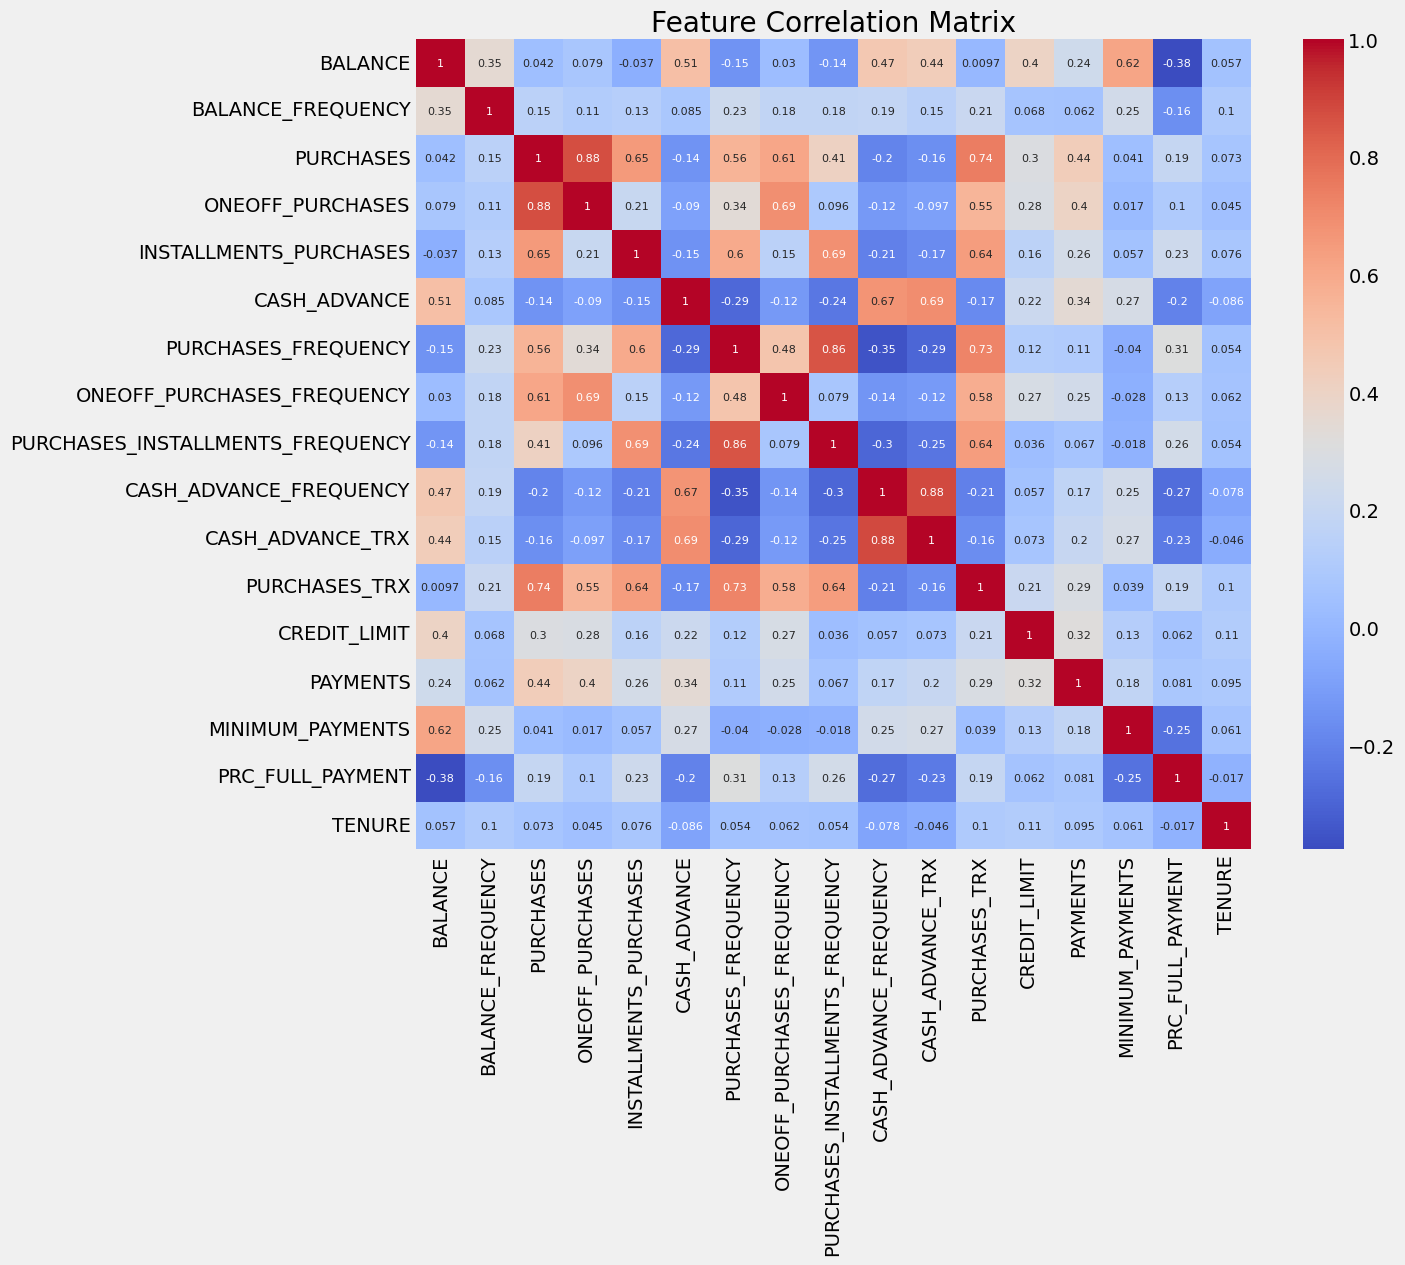

In [69]:
corr_matrix = norm_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', annot_kws={"size": 8})
plt.title("Feature Correlation Matrix")
plt.show()

<a id="kmean"></a>
# <p style="background-color:babypink; font-family:roboto; color:navy; font-size:125%;font-weight:bold; text-align:left; border-radius:25px 10px; padding: 10px">5 - KMeans Clustering </p>


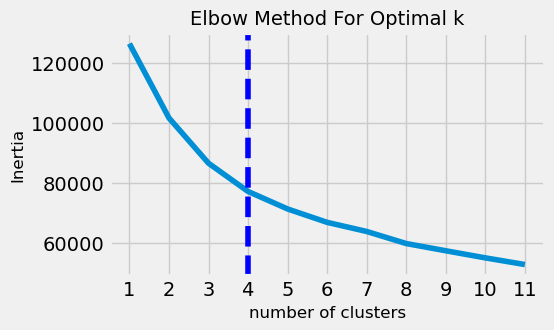

4

In [65]:
from sklearn.cluster import KMeans
List = []
kmeans_set = {"init": "random", "n_init":10 , "max_iter": 300, "random_state": 42}

for k in range (1,12): 
    kmeans = KMeans (n_clusters = k , **kmeans_set)
    kmeans.fit (norm_df)
    List.append (kmeans.inertia_)
    
! pip install kneed  
from kneed import KneeLocator 
k1 = KneeLocator (range (1,12), List, curve = "convex", direction = "decreasing")

plt.style.use ("fivethirtyeight")
plt.figure(figsize=(5,3))  
plt.plot (range (1,12), List)
plt.xticks (range (1,12))
plt.axvline (x = k1.elbow, color = "b", label = "axvline-full height", ls = "--")
plt.xlabel ("number of clusters", fontsize = 12)
plt.ylabel ("Inertia", fontsize = 12)
plt.title("Elbow Method For Optimal k", fontsize = 14)
plt.show ()
k1.elbow

<div style="border-radius:10px; padding: 30px; background-color: #ffd8e6; font-size:90%; text-align:left">
    
# Discussion: 
    
**The above for loop collects inetria of the kmeans in List, based on number of clusters.**
   
The elbow locator method in knee library discovered the elbow point to be **k=4**. 
    
for larger k values we will have overfitting & 
    
for smaller k values we will have underfitting 

<a id="si"></a>
## <p style=" font-family:roboto; color:babypink; font-size:115%; color:navy; text-align:left; padding: 0px">5.1 - <span style="color:navy;font-weight:bold"> Silouette Coefficient


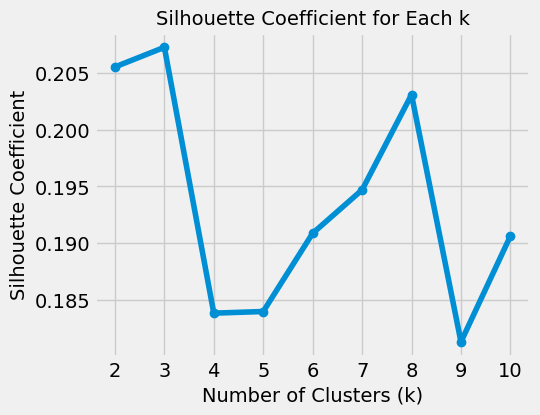

In [66]:

from sklearn.metrics import silhouette_score 

silhouette_coefficients = []

# Assuming 'norm_df' contains your normalized data
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_set)  # Replace **kmeans_set with your parameters
    kmeans.fit(norm_df)
    score = silhouette_score(norm_df, kmeans.labels_)
    silhouette_coefficients.append(score)

# Plotting silhouette coefficients
plt.figure(figsize=(5, 4))  # Set the figure size before plotting
plt.plot(range(2, 11), silhouette_coefficients, marker='o')

plt.xlabel('Number of Clusters (k)', fontsize = 14)
plt.ylabel('Silhouette Coefficient', fontsize = 14)
plt.title('Silhouette Coefficient for Each k', fontsize = 14)
plt.xticks(range(2, 11))
plt.grid(True)
plt.show()


<div style="border-radius:10px; padding: 30px; background-color: #ffd8e6; font-size:90%; text-align:left">
    
# Discussion: 
    
Based on the Silhouette Coefficient, **k=3** has better score. 

<a id="CH"></a>
## <p style=" font-family:roboto; color:babypink; font-size:115%; color:navy; text-align:left; padding: 0px">5.2 - <span style="color:navy;font-weight:bold"> Calinski Harabasz Score


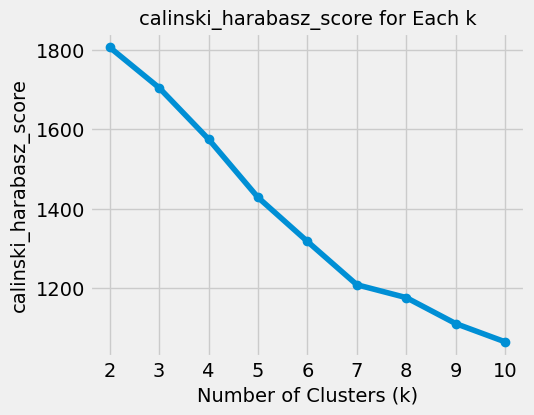

In [67]:
from sklearn.metrics import calinski_harabasz_score

CH_index = []

# Assuming 'norm_df' contains your normalized data
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_set)  # Replace **kmeans_set with your parameters
    kmeans.fit(norm_df)
    CH_score = calinski_harabasz_score(norm_df, kmeans.labels_)
    CH_index.append(CH_score)

# Plotting silhouette coefficients
plt.figure(figsize=(5, 4))  # Set the figure size before plotting
plt.plot(range(2, 11), CH_index, marker='o')

plt.xlabel('Number of Clusters (k)', fontsize = 14)
plt.ylabel('calinski_harabasz_score', fontsize = 14)
plt.title('calinski_harabasz_score for Each k', fontsize = 14)
plt.xticks(range(2, 11))
plt.grid(True)
plt.show()



<div style="border-radius:10px; padding: 30px; background-color: #ffd8e6; font-size:90%; text-align:left">
    
# Discussion: 
    
**Considering the k range and evaluation criteria, it seems that k=3 gives better clustering score**

<a id="okmean"></a>
## <p style=" font-family:roboto; color:babypink; font-size:115%; color:navy; text-align:left; padding: 0px">5.3 - <span style="color:navy;font-weight:bold"> Optimized KMean algorithm


In [112]:
kmeans = KMeans (n_clusters = 3, n_init = 'auto' ).fit (norm_df)
centroids = kmeans. cluster_centers_
print (centroids)

[[ 0.93941243  0.29072987 -0.50194686 -0.34866304 -0.47092222  1.21009604
  -0.75531353 -0.37851473 -0.63169287  1.32809956  1.26583638 -0.54629543
   0.24978576  0.33392519  0.61018974 -0.43439181 -0.08542967]
 [ 0.08161794  0.37710494  1.55524753  1.25168819  1.18843784 -0.30596135
   1.07196517  1.20036619  0.83304278 -0.36572458 -0.33012207  1.45248831
   0.62271208  0.71247036  0.07200073  0.35235819  0.20232203]
 [-0.42927249 -0.25653213 -0.33266076 -0.29131668 -0.21694946 -0.40845511
  -0.05473752 -0.26054671 -0.0234657  -0.43776598 -0.42373082 -0.27762787
  -0.32540854 -0.39283887 -0.28550543  0.06137163 -0.03469141]]


In [115]:
Si_kmeans = silhouette_score(norm_df,kmeans.labels_)
CH_kmeans = calinski_harabasz_score(norm_df,kmeans.labels_)

<div style="border-radius:10px; padding: 30px; background-color: #ffd8e6; font-size:90%; text-align:left">
   
**Correlation to find two features with high correlation for scatter plots and visualization**

<a id="vis2k"></a>
## <p style=" font-family:roboto; color:babypink; font-size:115%; color:navy; text-align:left; padding: 0px">5.4 - <span style="color:navy;font-weight:bold"> KMean Visulaization for 2 features


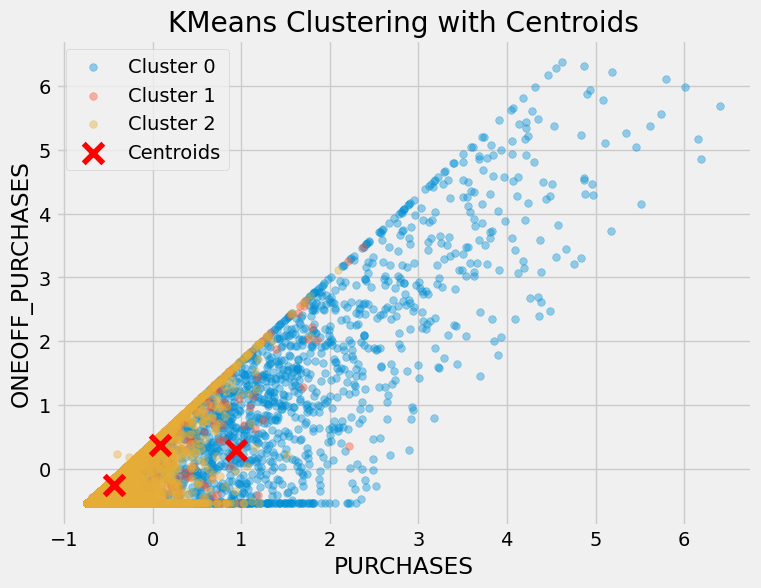

In [70]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(8, 6))

for i in range(kmeans.n_clusters):
    cluster = norm_df[kmeans.labels_ == i]
    plt.scatter(cluster['PURCHASES'], cluster['ONEOFF_PURCHASES'], s=30, alpha=0.4, label=f'Cluster {i}')

# Plot the centroids
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='x', label='Centroids')

plt.xlabel("PURCHASES")
plt.ylabel("ONEOFF_PURCHASES")
plt.title("KMeans Clustering with Centroids")
plt.legend()
plt.show()

<div style="border-radius:10px; padding: 30px; background-color: #ffd8e6; font-size:90%; text-align:left">

The clustering by KMeans is done in a 17 dimensions, and plotting a scatter in 2D doesn't provide a good clustering visulaization. As illustrated above, clusters are formed inward of the surface and in other dimensions. 

<a id="facet"></a>
## <p style=" font-family:roboto; color:babypink; font-size:115%; color:navy; text-align:left; padding: 0px">5.5 - <span style="color:navy;font-weight:bold"> FacetGrid Visualization


In [71]:
# store cluster predictions with original data
cluster_df = pd.concat([norm_df, pd.DataFrame({"cluster":kmeans.labels_})], axis=1)
cluster_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,-0.809143,-0.334566,-0.641470,-0.543566,-0.448046,-0.544065,-0.805056,-0.668728,-0.698370,-0.690722,-0.587284,-0.665209,-1.021764,-0.763302,-0.562286,-0.531707,0.312280,2
1,1.273915,0.091387,-0.734488,-0.543566,-0.636560,4.670692,-1.225548,-0.668728,-0.910633,0.883997,0.427547,-0.797483,1.021607,1.952538,0.621588,0.232306,0.312280,1
2,0.807885,0.517341,0.019375,0.430578,-0.636560,-0.544065,1.297399,2.807552,-0.910633,-0.690722,-0.587284,-0.003836,1.191888,-0.470735,0.056759,-0.531707,0.312280,0
3,0.262026,-1.186473,0.727081,1.345077,-0.636560,-0.377505,-1.015303,-0.379039,-0.910633,-0.165818,-0.333576,-0.731346,1.191888,-0.903786,-0.257291,-0.531707,0.312280,2
4,-0.297324,0.517341,-0.718888,-0.523408,-0.636560,-0.544065,-1.015303,-0.379039,-0.910633,-0.690722,-0.587284,-0.731346,-0.953651,-0.431564,-0.428671,-0.531707,0.312280,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7425,-0.756174,-0.654033,-0.358848,-0.058164,-0.636560,-0.406832,0.035925,1.069412,-0.910633,0.096637,0.173839,-0.334523,-1.192045,-0.835407,-0.594731,-0.531707,-4.696327,2
7426,-0.799756,-0.068346,-0.575256,-0.543566,-0.313853,-0.544065,0.982031,-0.668728,0.999742,-0.690722,-0.587284,-0.334523,-1.021764,-0.860194,-0.600270,-0.531707,-4.696327,2
7427,-0.263318,-0.654033,-0.734488,-0.543566,-0.636560,0.389893,-1.225548,-0.668728,-0.910633,0.096637,0.173839,-0.797483,-0.953651,-0.798838,-0.310394,-0.531707,-4.696327,2
7428,-0.745335,0.517341,-0.304500,-0.543566,0.234873,-0.544065,0.666662,-0.668728,0.681347,-0.690722,-0.587284,-0.400660,-1.021764,-0.785963,-0.581157,-0.531707,-4.696327,2


**Visualizing the distribution of each feature's values whithin each cluster**

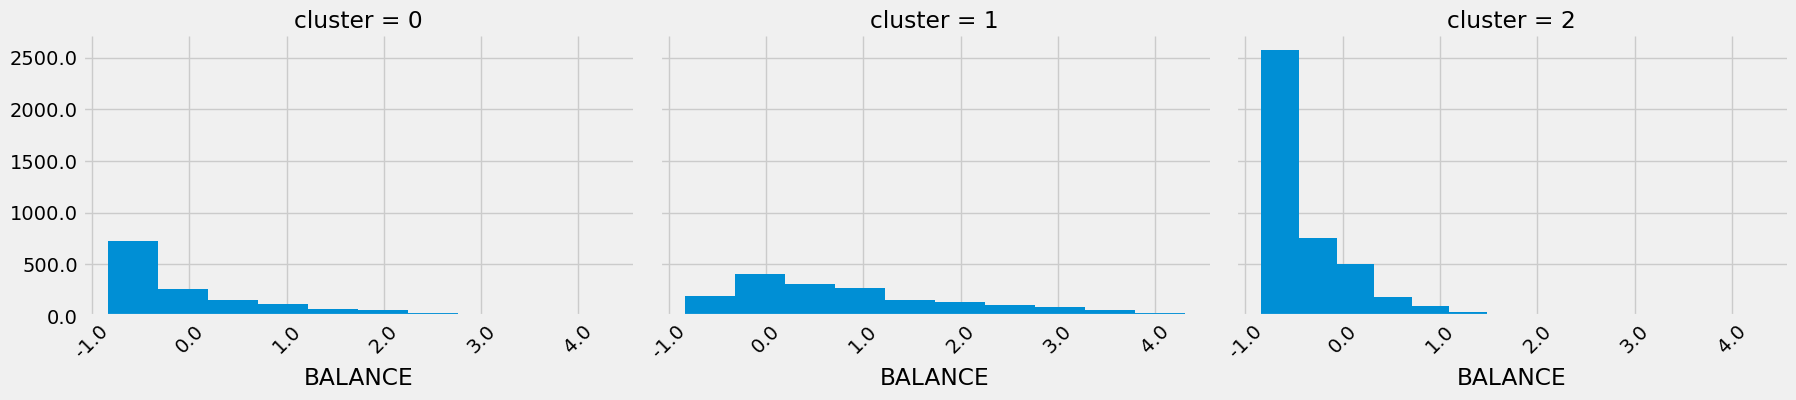

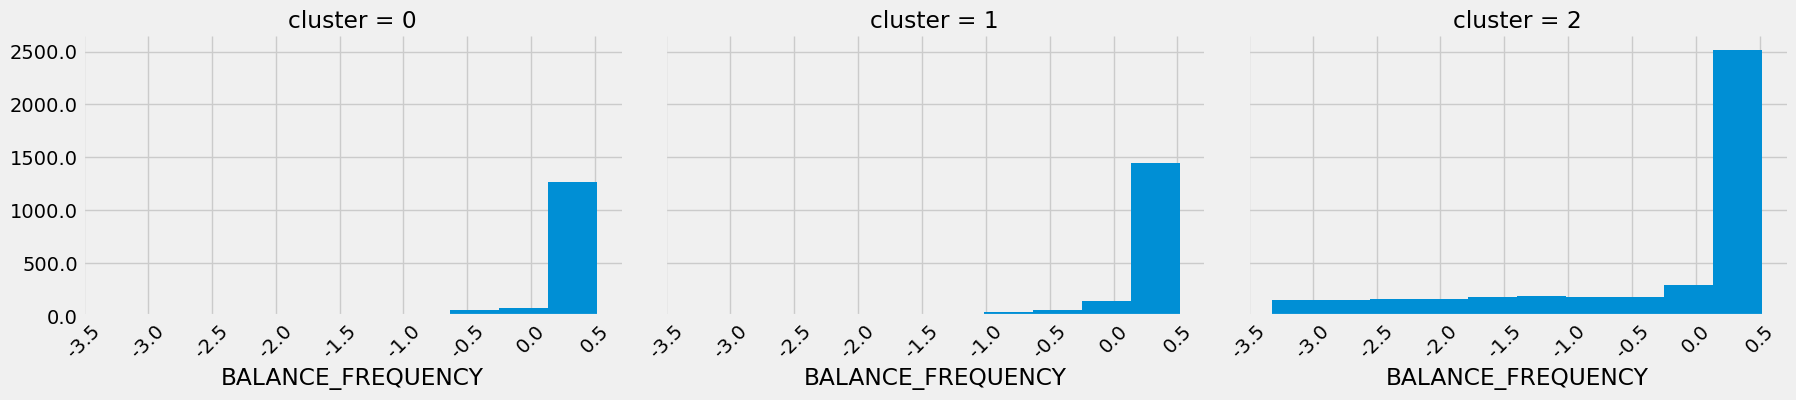

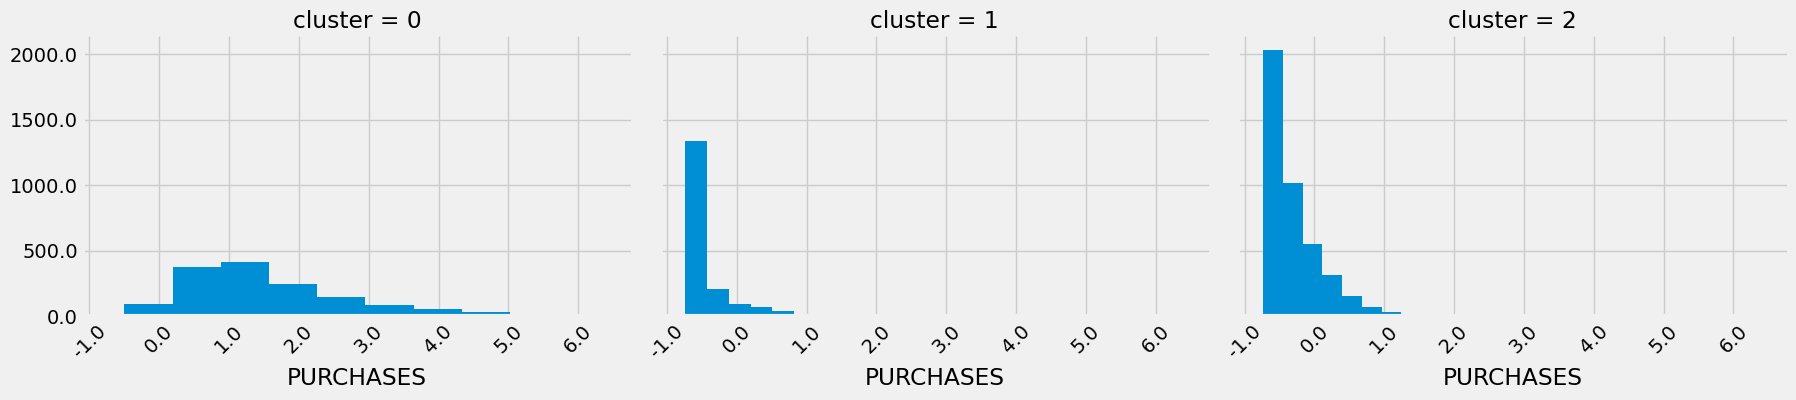

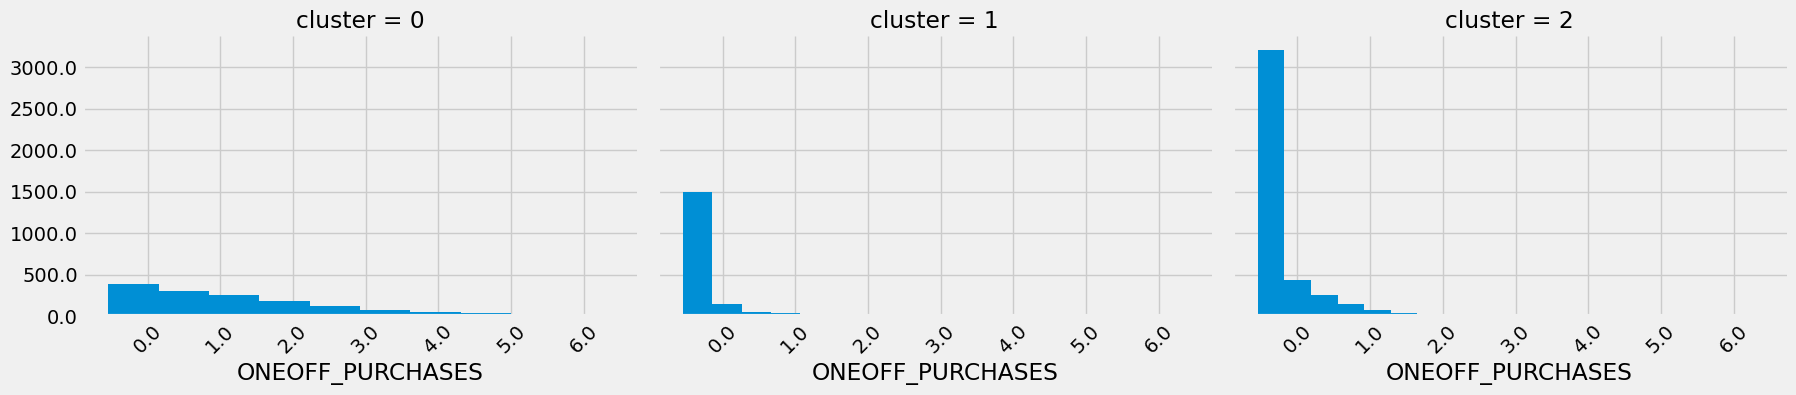

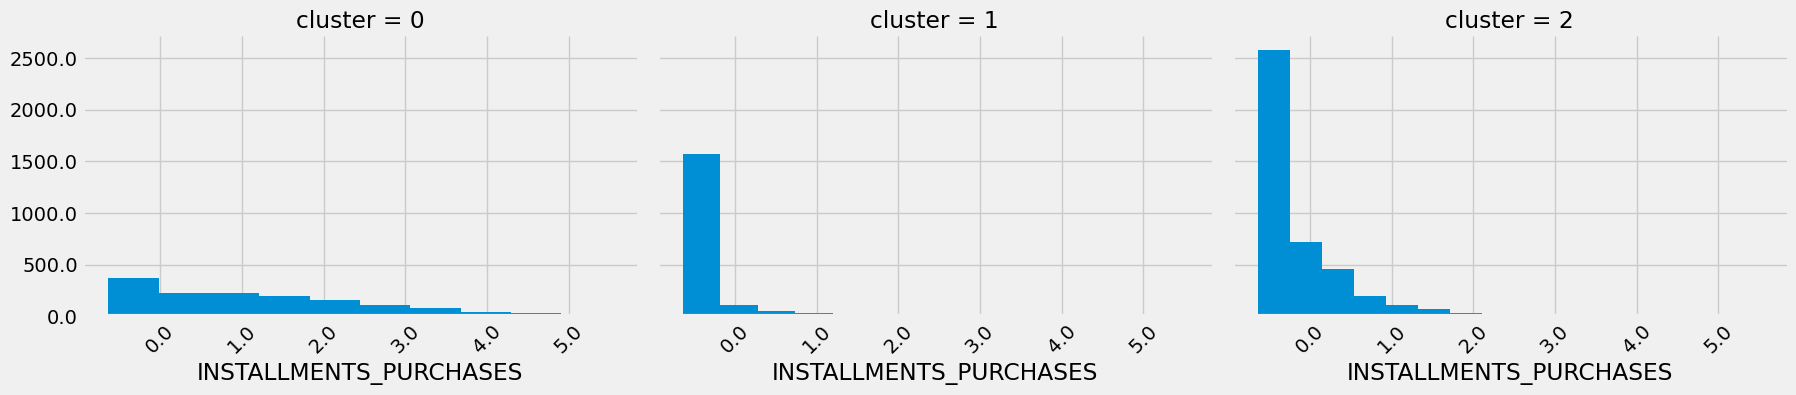

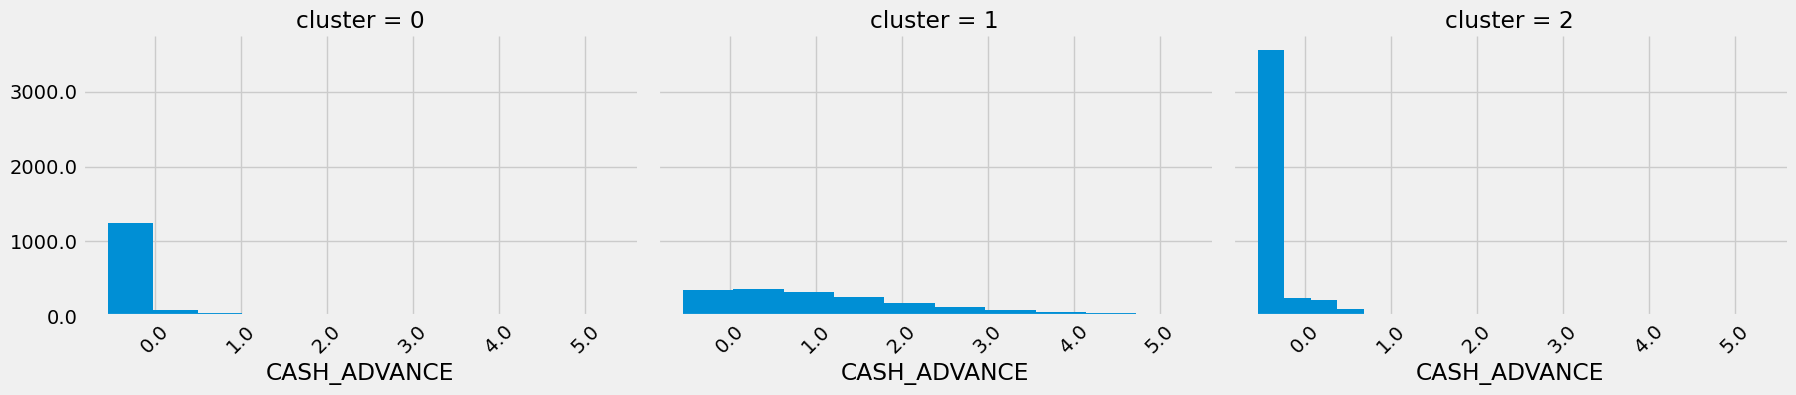

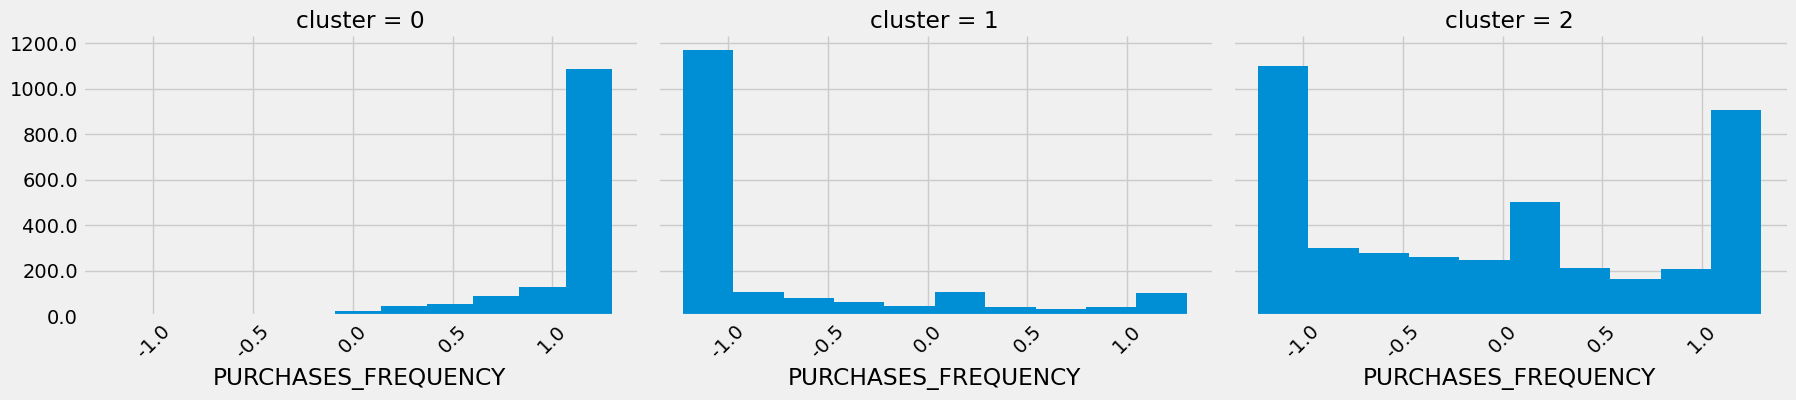

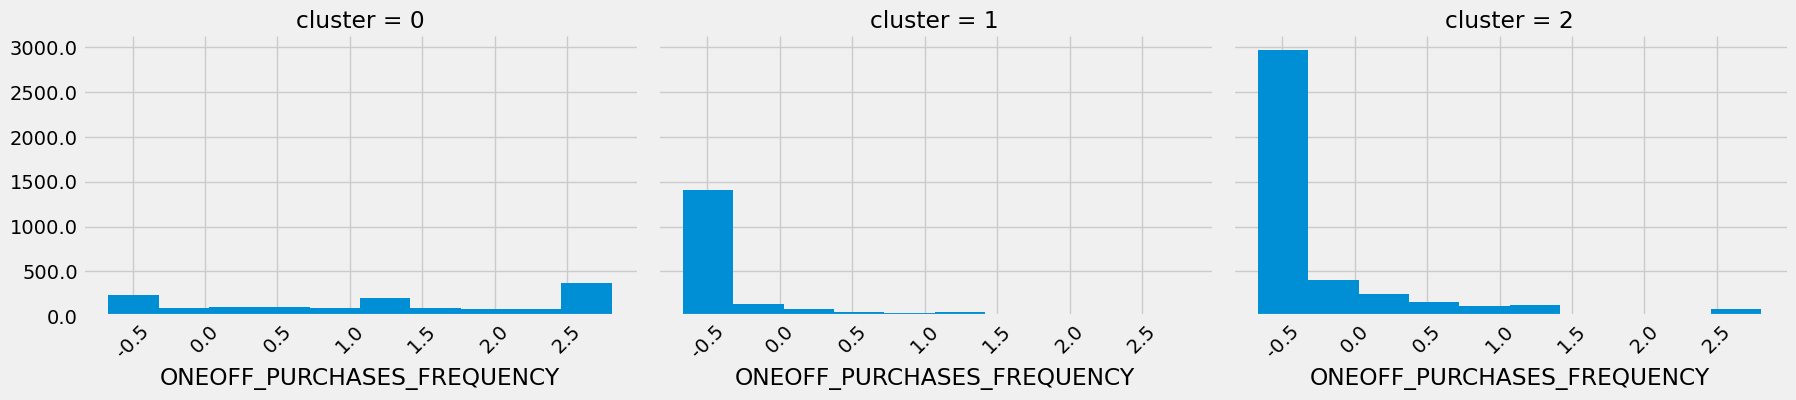

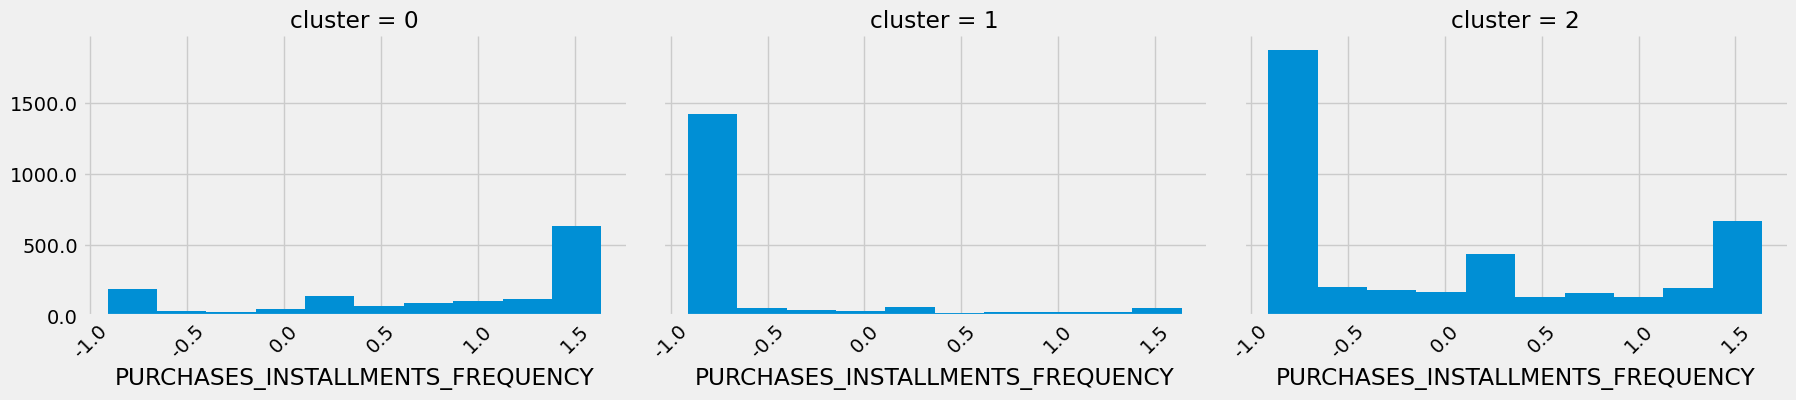

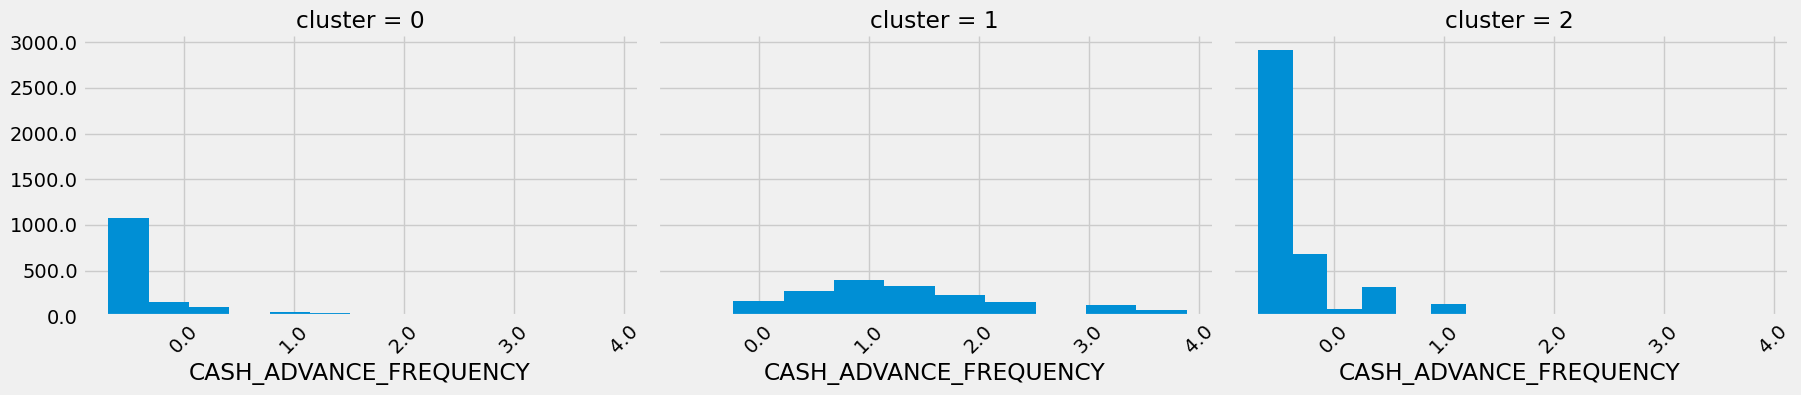

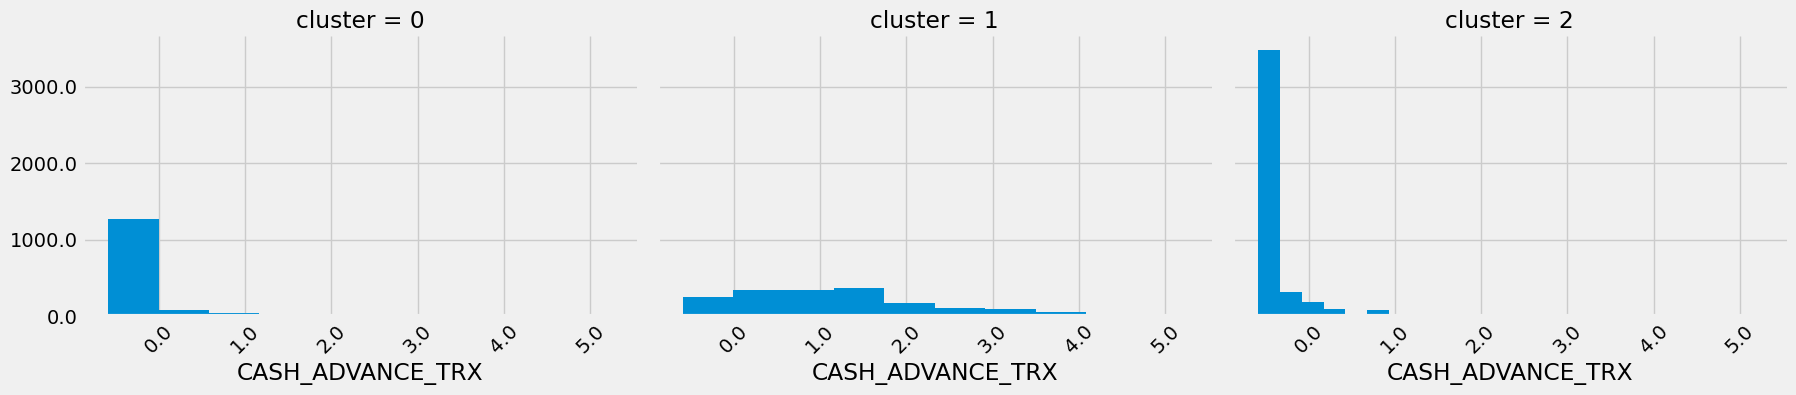

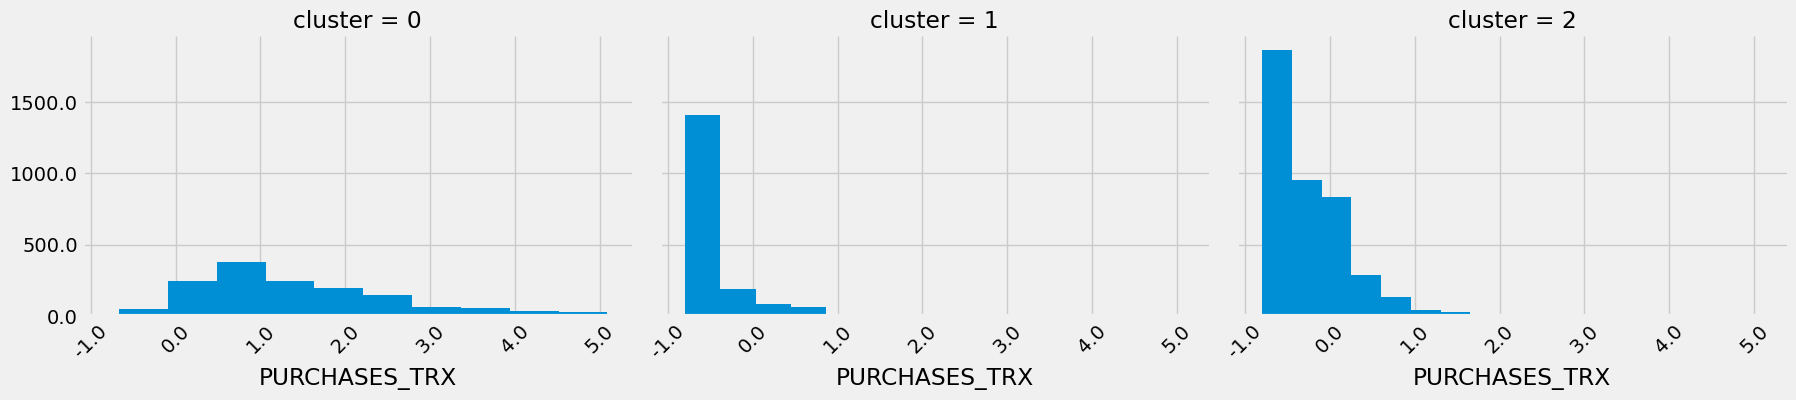

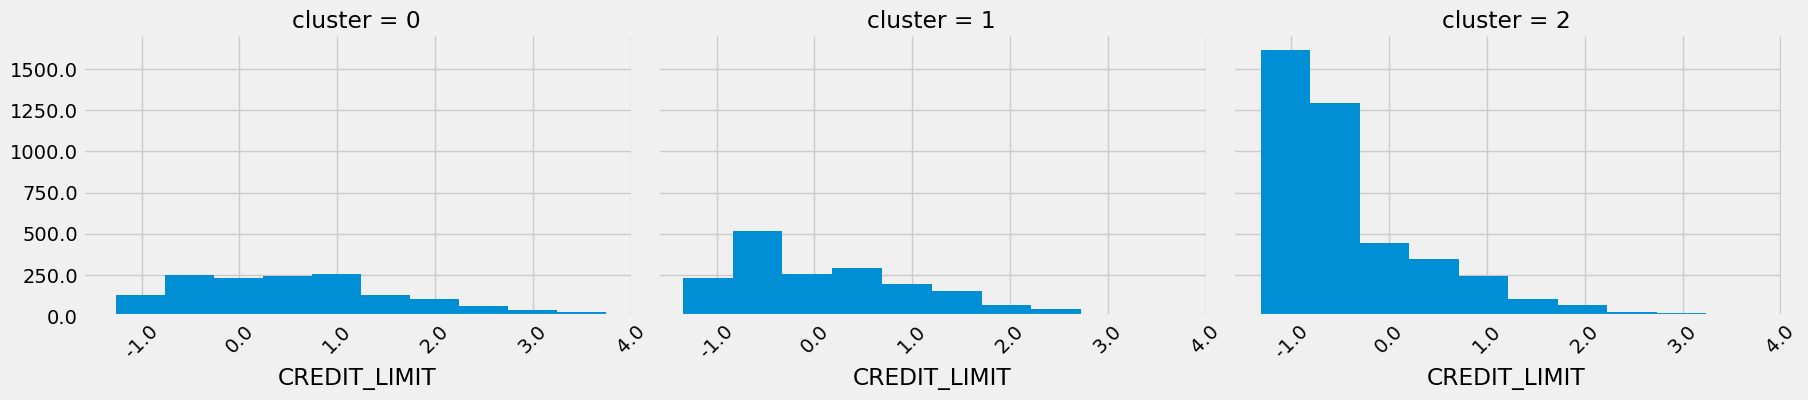

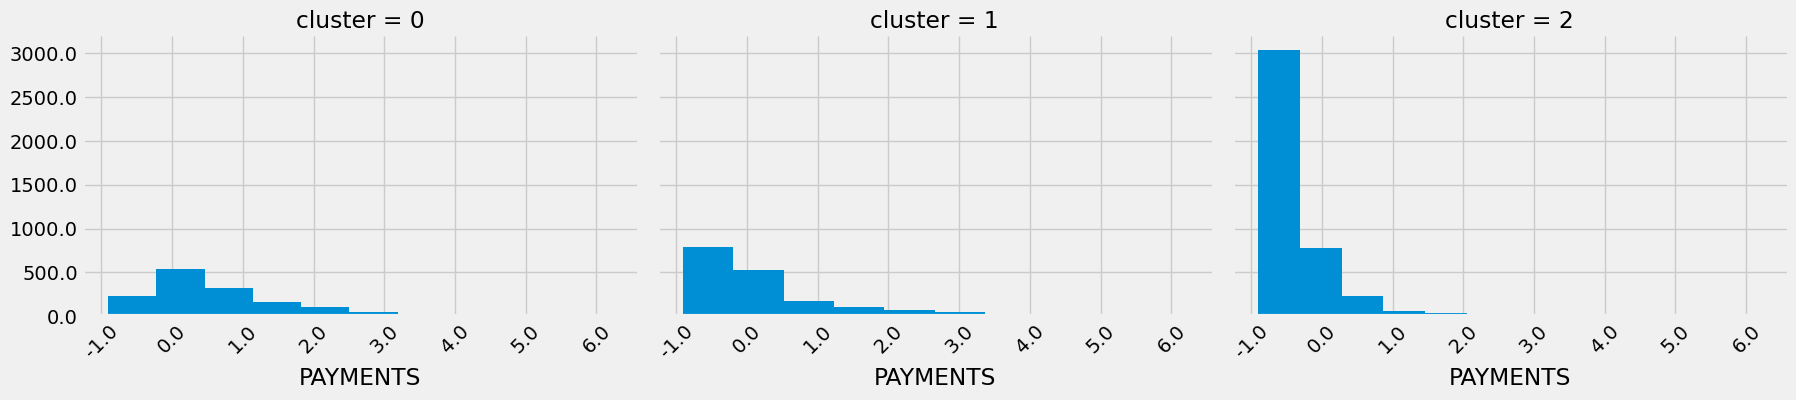

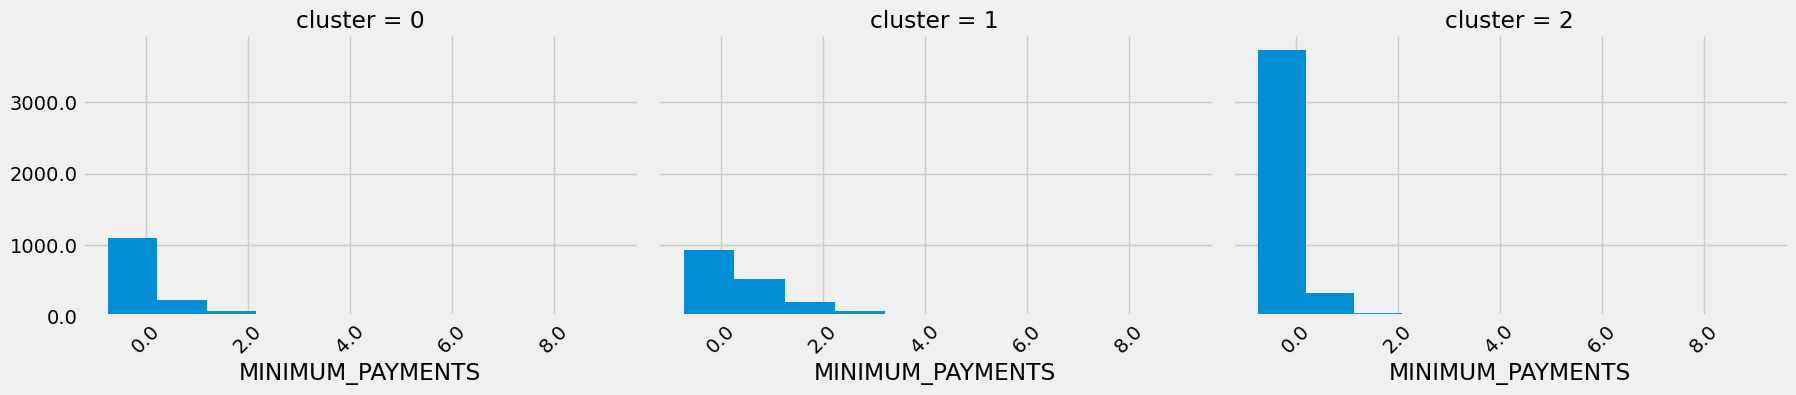

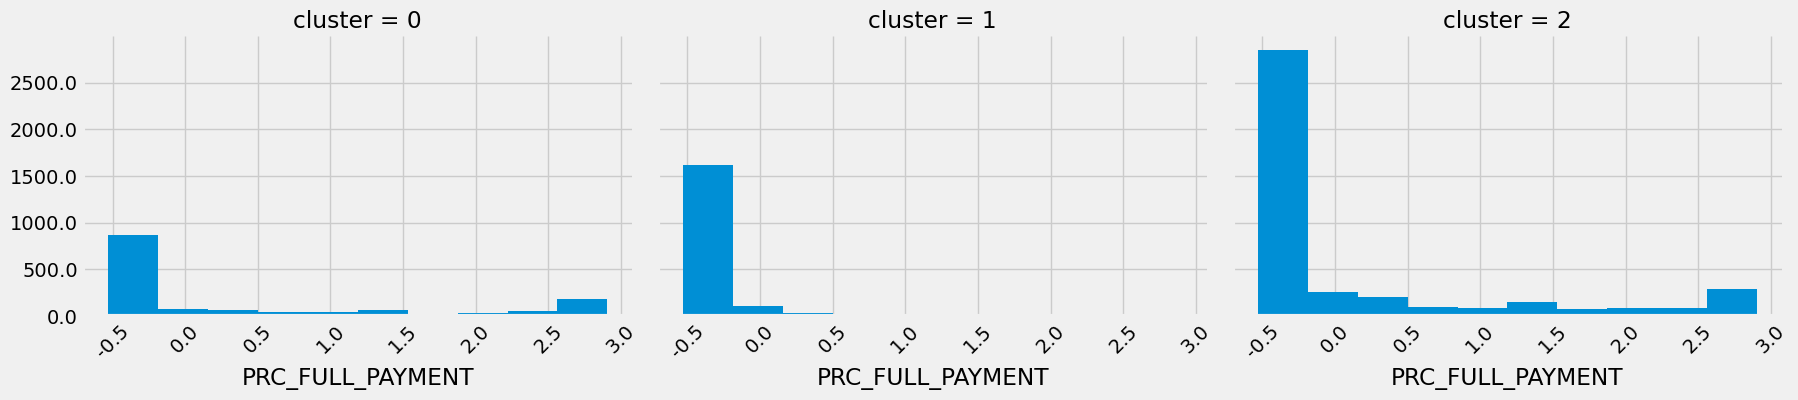

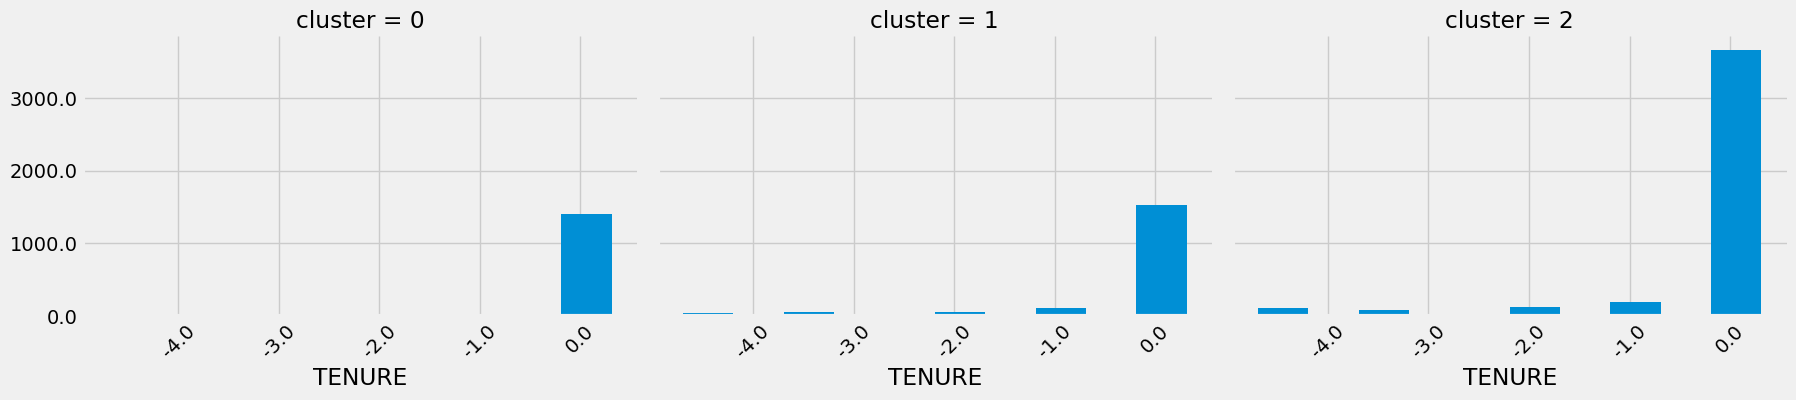

In [72]:
import warnings
warnings.simplefilter("ignore", category=UserWarning)

# Iterate over each column (feature) except the 'cluster' column
for feature in cluster_df.columns[:-1]:
    grid = sns.FacetGrid(cluster_df, col="cluster", height=4, aspect=1.5)
    grid.map(plt.hist, feature)
    
    # Reduce the font size and rotate the x-tick labels
    for ax in grid.axes.flat:
        ax.set_xticklabels(ax.get_xticks(), size=14, rotation=45)
        ax.set_yticklabels(ax.get_yticks(), size=14)
    
    # Adjust the subplot layout
    plt.subplots_adjust(top=0.9, bottom=0.2)
    
    plt.show()

<div style="border-radius:10px; padding: 30px; background-color: #ffd8e6; font-size:90%; text-align:left">

# Discussion: 
    
The abobe plot indicates how is the distribution of each feature within each cluster. This gives information of the purchase behavior of customers in each cluster. After analyzing the distributions and comparing the plots, I concluded that each cluster represents a specific buckets of credit card behavior:
    
  
**Cluster 0: have less budget, less credit history, and less purchases**
    
**Cluster 1: Make all types of purchases & more cash advance**
      
**Cluster 2: Make more purchases. They have higher budget and more balance to purchase, and higher credit history**

<a id="db"></a>
# <p style="background-color:babypink; font-family:roboto; color:navy; font-size:125%;font-weight:bold; text-align:left; border-radius:25px 10px; padding: 10px">6 - DBSCAN Clustering </p>


In [93]:
from sklearn.cluster import DBSCAN

min_samples = range(2, 10)
eps_values = range(1, 15)
df_dbscan = []

# Assuming norm_df is defined and prepared
for i in min_samples:
    for c in eps_values:
        dbscan = DBSCAN(min_samples=i, algorithm='auto', eps=c)
        dbscan.fit(norm_df)
        
       # Check if more than one label is present
        if len(set(dbscan.labels_)) > 1:
            silhouette_coef = silhouette_score(norm_df, dbscan.labels_)
            calinski_score = calinski_harabasz_score(norm_df, dbscan.labels_)
            
            df_dbscan.append({'eps': c, 
                'minsamples': i,
                'silhouette_coefficients': silhouette_coef,
                'calinski_harabasz': calinski_score,
            })

# Convert list of dictionaries to DataFrame
df_dbscan = pd.DataFrame(df_dbscan)

# Sort DataFrame by silhouette_coefficients and calinski_harabasz in descending order
sorted_df = df_dbscan.sort_values(by=['silhouette_coefficients', 'calinski_harabasz'], ascending=False)

# Display the sorted DataFrame
sorted_df.head()

,eps,minsamples,silhouette_coefficients,calinski_harabasz
5,6,2,0.630329,12.487453
11,6,3,0.630329,12.487453
17,6,4,0.630329,12.487453
23,6,5,0.630329,12.487453
29,6,6,0.630329,12.487453


<a id="odb"></a>
## <p style=" font-family:roboto; color:babypink; font-size:115%; color:navy; text-align:left; padding: 0px">6.1 - <span style="color:navy;font-weight:bold"> Optimized DBSCAN


In [136]:
dbscan=DBSCAN(min_samples=3,algorithm='auto',eps=6)  # 2 min_samples gives error in evaluation (Silhoutte coeff)
dbscan.fit(norm_df)
predict_DBSCAN=dbscan.fit_predict(norm_df)
cluster_df['predict_DBSCAN']=predict_DBSCAN
cluster_df.rename(columns={'cluster': 'predict_kmean'}, inplace=True)
cluster_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,predict_kmean,predict_DBSCAN,predict_Meanshift,predict_Minibatch,predict_GMM
0,-0.809143,-0.334566,-0.641470,-0.543566,-0.448046,-0.544065,-0.805056,-0.668728,-0.698370,-0.690722,...,-1.021764,-0.763302,-0.562286,-0.531707,0.312280,2,0,0,1,3
1,1.273915,0.091387,-0.734488,-0.543566,-0.636560,4.670692,-1.225548,-0.668728,-0.910633,0.883997,...,1.021607,1.952538,0.621588,0.232306,0.312280,1,0,0,1,0
2,0.807885,0.517341,0.019375,0.430578,-0.636560,-0.544065,1.297399,2.807552,-0.910633,-0.690722,...,1.191888,-0.470735,0.056759,-0.531707,0.312280,0,0,0,0,6
3,0.262026,-1.186473,0.727081,1.345077,-0.636560,-0.377505,-1.015303,-0.379039,-0.910633,-0.165818,...,1.191888,-0.903786,-0.257291,-0.531707,0.312280,2,0,0,1,2
4,-0.297324,0.517341,-0.718888,-0.523408,-0.636560,-0.544065,-1.015303,-0.379039,-0.910633,-0.690722,...,-0.953651,-0.431564,-0.428671,-0.531707,0.312280,2,0,0,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7425,-0.756174,-0.654033,-0.358848,-0.058164,-0.636560,-0.406832,0.035925,1.069412,-0.910633,0.096637,...,-1.192045,-0.835407,-0.594731,-0.531707,-4.696327,2,0,0,1,2
7426,-0.799756,-0.068346,-0.575256,-0.543566,-0.313853,-0.544065,0.982031,-0.668728,0.999742,-0.690722,...,-1.021764,-0.860194,-0.600270,-0.531707,-4.696327,2,0,0,1,3
7427,-0.263318,-0.654033,-0.734488,-0.543566,-0.636560,0.389893,-1.225548,-0.668728,-0.910633,0.096637,...,-0.953651,-0.798838,-0.310394,-0.531707,-4.696327,2,0,0,1,0
7428,-0.745335,0.517341,-0.304500,-0.543566,0.234873,-0.544065,0.666662,-0.668728,0.681347,-0.690722,...,-1.021764,-0.785963,-0.581157,-0.531707,-4.696327,2,0,0,1,3


In [138]:
Si_dbscan = silhouette_score(norm_df,dbscan.labels_)
CH_dbscan = calinski_harabasz_score(norm_df,dbscan.labels_)

<a id="ms"></a>
# <p style="background-color:babypink; font-family:roboto; color:navy; font-size:125%;font-weight:bold; text-align:left; border-radius:25px 10px; padding: 10px">7 - MeanShift Clustering  </p>


In [92]:
from sklearn.cluster import MeanShift, estimate_bandwidth

bandwidth_values = range(1, 14)
df_meansh = []

# Assuming norm_df is defined and prepared
for d in bandwidth_values:
    meanshift = MeanShift(bandwidth=d, bin_seeding=True)
    meanshift.fit(norm_df)
    
    # Check if more than one label is present
    if len(set(meanshift.labels_)) > 1:
        # Calculate metrics
        silhouette_coef = silhouette_score(norm_df, meanshift.labels_)
        calinski_score = calinski_harabasz_score(norm_df, meanshift.labels_)
        
        # Append results to df_meansh as dictionary
        df_meansh.append({
            'bandwidth': d,
            'silhouette_coefficients': silhouette_coef,
            'calinski_harabasz': calinski_score
        })

# Convert list of dictionaries to DataFrame
df_meansh = pd.DataFrame(df_meansh)

# Sort DataFrame by silhouette_coefficients and calinski_harabasz in descending order
sorted_df_meansh = df_meansh.sort_values(by=['silhouette_coefficients', 'calinski_harabasz'], ascending=False)

# Display the sorted DataFrame
sorted_df_meansh.head()


,bandwidth,silhouette_coefficients,calinski_harabasz
4,5,0.414592,223.330739
3,4,0.250597,179.288618
1,2,0.154612,170.333254
2,3,0.123855,134.186408
0,1,0.070037,490.862003


<a id="oms"></a>
## <p style=" font-family:roboto; color:babypink; font-size:115%; color:navy; text-align:left; padding: 0px">7.1 - <span style="color:navy;font-weight:bold"> Optimizaed MeanShift


In [95]:
meanshift=MeanShift(bandwidth=5, bin_seeding=True)
meanshift.fit(norm_df)
predict_meanshift=meanshift.fit_predict(norm_df)
cluster_df['predict_Meanshift']=predict_meanshift
cluster_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,predict_kmean,predict_DBSCAN,predict_Meanshift
0,-0.809143,-0.334566,-0.641470,-0.543566,-0.448046,-0.544065,-0.805056,-0.668728,-0.698370,-0.690722,-0.587284,-0.665209,-1.021764,-0.763302,-0.562286,-0.531707,0.312280,2,0,0
1,1.273915,0.091387,-0.734488,-0.543566,-0.636560,4.670692,-1.225548,-0.668728,-0.910633,0.883997,0.427547,-0.797483,1.021607,1.952538,0.621588,0.232306,0.312280,1,0,0
2,0.807885,0.517341,0.019375,0.430578,-0.636560,-0.544065,1.297399,2.807552,-0.910633,-0.690722,-0.587284,-0.003836,1.191888,-0.470735,0.056759,-0.531707,0.312280,0,0,0
3,0.262026,-1.186473,0.727081,1.345077,-0.636560,-0.377505,-1.015303,-0.379039,-0.910633,-0.165818,-0.333576,-0.731346,1.191888,-0.903786,-0.257291,-0.531707,0.312280,2,0,0
4,-0.297324,0.517341,-0.718888,-0.523408,-0.636560,-0.544065,-1.015303,-0.379039,-0.910633,-0.690722,-0.587284,-0.731346,-0.953651,-0.431564,-0.428671,-0.531707,0.312280,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7425,-0.756174,-0.654033,-0.358848,-0.058164,-0.636560,-0.406832,0.035925,1.069412,-0.910633,0.096637,0.173839,-0.334523,-1.192045,-0.835407,-0.594731,-0.531707,-4.696327,2,0,0
7426,-0.799756,-0.068346,-0.575256,-0.543566,-0.313853,-0.544065,0.982031,-0.668728,0.999742,-0.690722,-0.587284,-0.334523,-1.021764,-0.860194,-0.600270,-0.531707,-4.696327,2,0,0
7427,-0.263318,-0.654033,-0.734488,-0.543566,-0.636560,0.389893,-1.225548,-0.668728,-0.910633,0.096637,0.173839,-0.797483,-0.953651,-0.798838,-0.310394,-0.531707,-4.696327,2,0,0
7428,-0.745335,0.517341,-0.304500,-0.543566,0.234873,-0.544065,0.666662,-0.668728,0.681347,-0.690722,-0.587284,-0.400660,-1.021764,-0.785963,-0.581157,-0.531707,-4.696327,2,0,0


In [118]:
if len(set(dbscan.labels_)) > 1:
    Si_meanshift = silhouette_score(norm_df,meanshift.labels_)
    CH_meanshift = calinski_harabasz_score(norm_df,meanshift.labels_)

<a id="mb"></a>
# <p style="background-color:babypink; font-family:roboto; color:navy; font-size:125%;font-weight:bold; text-align:left; border-radius:25px 10px; padding: 10px">8 - MiniBatch Clustering  </p>


In [99]:
from sklearn.cluster import MiniBatchKMeans
import pandas as pd
from sklearn.metrics import silhouette_score, calinski_harabasz_score

init = ['random', 'k-means++']
random_state = [0, 42]
n_clusters = range(2, 11)
df_mb = []

# Assuming norm_df is defined and prepared
for i in init:
    for a in random_state:
        for c in n_clusters:
            minibatch = MiniBatchKMeans(n_clusters=c, batch_size=1024, init=i, random_state=a, n_init=3)
            minibatch.fit(norm_df)
            
            # Check if more than one label is present
            if len(set(minibatch.labels_)) > 1:
                # Calculate metrics
                silhouette_coef = silhouette_score(norm_df, minibatch.labels_)
                calinski_score = calinski_harabasz_score(norm_df, minibatch.labels_)
                
                # Append results to df_mb as dictionary
                df_mb.append({
                    'init': i,
                    'n_clusters': c,
                    'random_state': a,
                    'silhouette_coefficients': silhouette_coef,
                    'calinski_harabasz': calinski_score
                })

# Convert list of dictionaries to DataFrame
df_mb = pd.DataFrame(df_mb)

# Sort DataFrame by silhouette_coefficients and calinski_harabasz in descending order
sorted_df_mb = df_mb.sort_values(by=['silhouette_coefficients', 'calinski_harabasz'], ascending=False)

# Display the sorted DataFrame
sorted_df_mb.head()


,init,n_clusters,random_state,silhouette_coefficients,calinski_harabasz
18,k-means++,2,0,0.255570,1681.409373
28,k-means++,3,42,0.223897,1691.134482
1,random,3,0,0.208868,1700.753585
0,random,2,0,0.204161,1802.636110
27,k-means++,2,42,0.202699,1801.602969


<a id="omb"></a>
## <p style=" font-family:roboto; color:babypink; font-size:115%; color:navy; text-align:left; padding: 0px">8.1 - <span style="color:navy;font-weight:bold"> Optimizaed MiniBatch


In [100]:
minibatch = MiniBatchKMeans(n_clusters=2, batch_size=1024, init='k-means++', random_state=0, n_init=3)
minibatch.fit(norm_df)
predict_minibatch=minibatch.fit_predict(norm_df)
cluster_df['predict_Minibatch']=predict_minibatch
cluster_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,predict_kmean,predict_DBSCAN,predict_Meanshift,predict_Minibatch
0,-0.809143,-0.334566,-0.641470,-0.543566,-0.448046,-0.544065,-0.805056,-0.668728,-0.698370,-0.690722,...,-0.665209,-1.021764,-0.763302,-0.562286,-0.531707,0.312280,2,0,0,1
1,1.273915,0.091387,-0.734488,-0.543566,-0.636560,4.670692,-1.225548,-0.668728,-0.910633,0.883997,...,-0.797483,1.021607,1.952538,0.621588,0.232306,0.312280,1,0,0,1
2,0.807885,0.517341,0.019375,0.430578,-0.636560,-0.544065,1.297399,2.807552,-0.910633,-0.690722,...,-0.003836,1.191888,-0.470735,0.056759,-0.531707,0.312280,0,0,0,0
3,0.262026,-1.186473,0.727081,1.345077,-0.636560,-0.377505,-1.015303,-0.379039,-0.910633,-0.165818,...,-0.731346,1.191888,-0.903786,-0.257291,-0.531707,0.312280,2,0,0,1
4,-0.297324,0.517341,-0.718888,-0.523408,-0.636560,-0.544065,-1.015303,-0.379039,-0.910633,-0.690722,...,-0.731346,-0.953651,-0.431564,-0.428671,-0.531707,0.312280,2,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7425,-0.756174,-0.654033,-0.358848,-0.058164,-0.636560,-0.406832,0.035925,1.069412,-0.910633,0.096637,...,-0.334523,-1.192045,-0.835407,-0.594731,-0.531707,-4.696327,2,0,0,1
7426,-0.799756,-0.068346,-0.575256,-0.543566,-0.313853,-0.544065,0.982031,-0.668728,0.999742,-0.690722,...,-0.334523,-1.021764,-0.860194,-0.600270,-0.531707,-4.696327,2,0,0,1
7427,-0.263318,-0.654033,-0.734488,-0.543566,-0.636560,0.389893,-1.225548,-0.668728,-0.910633,0.096637,...,-0.797483,-0.953651,-0.798838,-0.310394,-0.531707,-4.696327,2,0,0,1
7428,-0.745335,0.517341,-0.304500,-0.543566,0.234873,-0.544065,0.666662,-0.668728,0.681347,-0.690722,...,-0.400660,-1.021764,-0.785963,-0.581157,-0.531707,-4.696327,2,0,0,1


In [120]:
if len(set(minibatch.labels_)) > 1:
    Si_minibatch = silhouette_score(norm_df,minibatch.labels_)
    CH_minibatch = calinski_harabasz_score(norm_df,minibatch.labels_)

<a id="gmm"></a>
# <p style="background-color:babypink; font-family:roboto; color:navy; font-size:125%;font-weight:bold; text-align:left; border-radius:25px 10px; padding: 10px">9 - Gaussian Mixture Model Clustering  </p>



To evaluate and determine the best number of components for the Gaussian Mixture Model (GMM), you can use the **Bayesian Information Criterion (BIC)** or the **Akaike Information Criterion (AIC)**. 

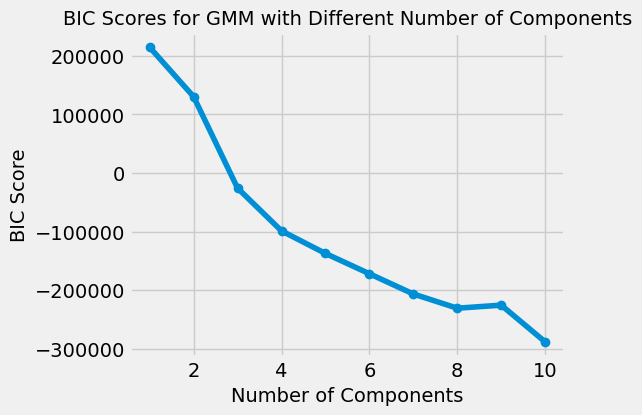

In [101]:
from sklearn.mixture import GaussianMixture

# Initialize variables to store the best model and corresponding BIC
best_gmm = None
lowest_bic = np.inf   # the positive infinity as the initial value to compare values and get the minimum value
bic_scores = []


# Evaluate different numbers of components
for n_components in range(1, 11):
    gmm = GaussianMixture(n_components=n_components, random_state=42)
    gmm.fit(norm_df)
    
    bic = gmm.bic(norm_df)
    bic_scores.append(bic)
    
    if bic < lowest_bic:
        lowest_bic = bic
        best_gmm = gmm

# Plot BIC scores
plt.figure(figsize=(5, 4))
plt.plot(range(1, 11), bic_scores, marker='o')
plt.xlabel('Number of Components', fontsize = 14)
plt.ylabel('BIC Score', fontsize = 14)
plt.title('BIC Scores for GMM with Different Number of Components', fontsize = 14)
plt.show()



<a id="grid"></a>
## <p style=" font-family:roboto; color:babypink; font-size:115%; color:navy; text-align:left; padding: 0px">9.1 - <span style="color:navy;font-weight:bold"> GridSearchCV for Model Optimization



**GridSearchCV to investigate the no. of components and covariance matrix**

In [102]:
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import GridSearchCV


def gmm_bic_score(estimator, norm_df):
    """Callable to pass to GridSearchCV that will use the BIC score."""
    # Make it negative since GridSearchCV expects a score to maximize
    return -estimator.bic(norm_df)


param_grid = {
    "n_components": range(1, 11),
    "covariance_type": ["spherical", "tied", "diag", "full"],
}
grid_search = GridSearchCV(
    GaussianMixture(), param_grid=param_grid, scoring=gmm_bic_score
)
grid_search.fit(norm_df)

GridSearchCV(estimator=GaussianMixture(),
             param_grid={'covariance_type': ['spherical', 'tied', 'diag',
                                             'full'],
                         'n_components': range(1, 11)},
             scoring=<function gmm_bic_score at 0x00000236C501A160>)

In [103]:

df2 = pd.DataFrame(grid_search.cv_results_)[
    ["param_n_components", "param_covariance_type", "mean_test_score"]
]
df2["mean_test_score"] = -df2["mean_test_score"]
df2 = df2.rename(
    columns={
        "param_n_components": "Number of components",
        "param_covariance_type": "Type of covariance",
        "mean_test_score": "BIC score",
    }
)
df2.sort_values(by="BIC score").head()


,Number of components,Type of covariance,BIC score
39,10,full,-42163.111128
37,8,full,-36051.595724
38,9,full,-35882.653207
36,7,full,-32147.207251
29,10,diag,-29363.130345


<div style="border-radius:10px; padding: 30px; background-color: #ffd8e6; font-size:100%; text-align:left">

# Discussion on different type of covariance model: 

"full": each component has its own general covariance matrix.

"tied": all components share the same general covariance matrix.

"diag": each component has its own diagonal covariance matrix.

"spherical": each component has its own single variance.

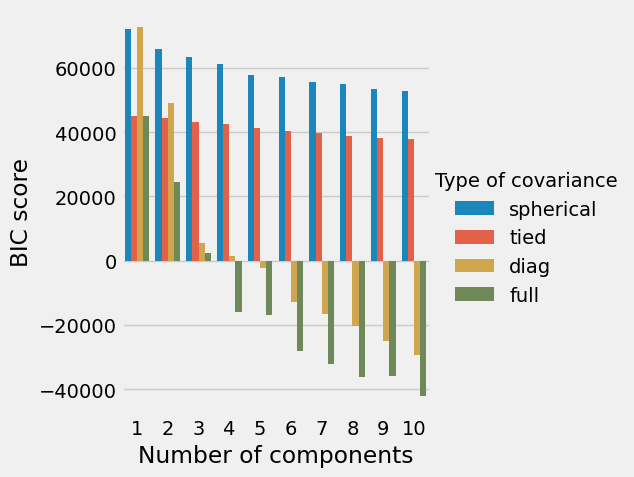

In [104]:
import seaborn as sns

sns.catplot(
    data=df2,
    kind="bar",
    x="Number of components",
    y="BIC score",
    hue="Type of covariance",
)
plt.show()

<div style="border-radius:10px; padding: 30px; background-color: #ffd8e6; font-size:90%; text-align:left">

# Discussion: 
    
The largest negative BIC score shows the best number of components and type of covariance. Therefore: 
    
  **10 clusters with full covariance has the best score**

<a id="gmmvisual"></a>
## <p style=" font-family:roboto; color:babypink; font-size:115%; color:navy; text-align:left; padding: 0px">9.2 - <span style="color:navy;font-weight:bold"> GMM Visulaization for 2 features




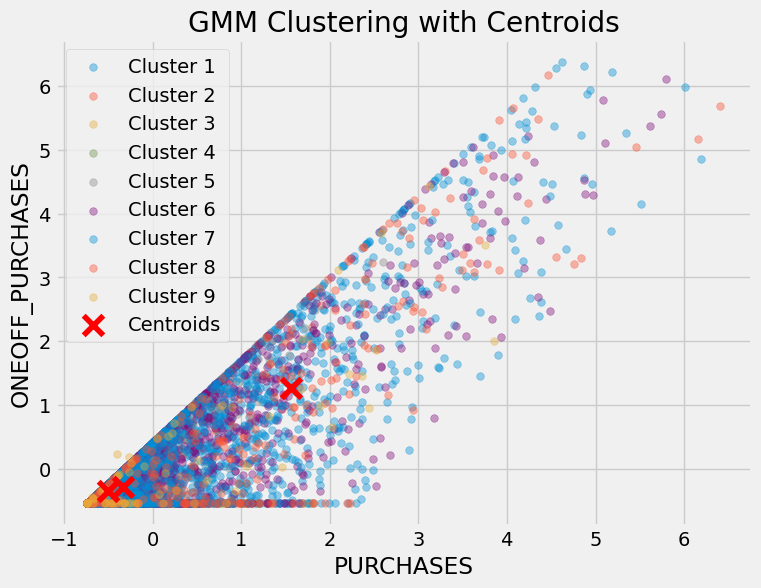

In [105]:
# Ensure labels array has the correct length
labels = gmm.predict(norm_df)
assert len(labels) == len(norm_df), f"Labels length {len(labels)} does not match norm_df length {len(norm_df)}"

plt.style.use("fivethirtyeight")
plt.figure(figsize=(8, 6))

# Plot clusters
for i in range(1,10):
    cluster_data = norm_df[labels == i]
    plt.scatter(cluster_data['PURCHASES'], cluster_data['ONEOFF_PURCHASES'], s=30, alpha=0.4, label=f'Cluster {i}')

# Plot centroids
plt.scatter(centroids[:, 2], centroids[:, 3], c='red', s=200, marker='x', label='Centroids')

plt.xlabel("PURCHASES")
plt.ylabel("ONEOFF_PURCHASES")
plt.title("GMM Clustering with Centroids")
plt.legend()
plt.show()

<div style="border-radius:10px; padding: 30px; background-color: #ffd8e6; font-size:100%; text-align:left">
    
**As the plot is in 2 dimension, it doesn't provide good information for 8 clustering behavior.**
    
    **The shown centroids are showing the centers of 2 representative clusters numbers 3 and 4.**

In [106]:

gmm = GaussianMixture(n_components=10, covariance_type= 'full', random_state=42)
gmm.fit(norm_df)
predict_gmm=gmm.fit_predict(norm_df)
cluster_df['predict_GMM']=predict_gmm
cluster_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,predict_kmean,predict_DBSCAN,predict_Meanshift,predict_Minibatch,predict_GMM
0,-0.809143,-0.334566,-0.641470,-0.543566,-0.448046,-0.544065,-0.805056,-0.668728,-0.698370,-0.690722,...,-1.021764,-0.763302,-0.562286,-0.531707,0.312280,2,0,0,1,3
1,1.273915,0.091387,-0.734488,-0.543566,-0.636560,4.670692,-1.225548,-0.668728,-0.910633,0.883997,...,1.021607,1.952538,0.621588,0.232306,0.312280,1,0,0,1,0
2,0.807885,0.517341,0.019375,0.430578,-0.636560,-0.544065,1.297399,2.807552,-0.910633,-0.690722,...,1.191888,-0.470735,0.056759,-0.531707,0.312280,0,0,0,0,6
3,0.262026,-1.186473,0.727081,1.345077,-0.636560,-0.377505,-1.015303,-0.379039,-0.910633,-0.165818,...,1.191888,-0.903786,-0.257291,-0.531707,0.312280,2,0,0,1,2
4,-0.297324,0.517341,-0.718888,-0.523408,-0.636560,-0.544065,-1.015303,-0.379039,-0.910633,-0.690722,...,-0.953651,-0.431564,-0.428671,-0.531707,0.312280,2,0,0,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7425,-0.756174,-0.654033,-0.358848,-0.058164,-0.636560,-0.406832,0.035925,1.069412,-0.910633,0.096637,...,-1.192045,-0.835407,-0.594731,-0.531707,-4.696327,2,0,0,1,2
7426,-0.799756,-0.068346,-0.575256,-0.543566,-0.313853,-0.544065,0.982031,-0.668728,0.999742,-0.690722,...,-1.021764,-0.860194,-0.600270,-0.531707,-4.696327,2,0,0,1,3
7427,-0.263318,-0.654033,-0.734488,-0.543566,-0.636560,0.389893,-1.225548,-0.668728,-0.910633,0.096637,...,-0.953651,-0.798838,-0.310394,-0.531707,-4.696327,2,0,0,1,0
7428,-0.745335,0.517341,-0.304500,-0.543566,0.234873,-0.544065,0.666662,-0.668728,0.681347,-0.690722,...,-1.021764,-0.785963,-0.581157,-0.531707,-4.696327,2,0,0,1,3


In [124]:

Si_gmm = silhouette_score(norm_df,gmm.predict(norm_df))
CH_gmm = calinski_harabasz_score(norm_df,gmm.predict(norm_df))


<a id="pca"></a>
# <p style="background-color:babypink; font-family:roboto; color:navy; font-size:125%;font-weight:bold; text-align:left; border-radius:25px 10px; padding: 10px">10 - Visualization Using Principle Component Analyzer  </p>



**PCA decompose the d dimensio to 2 dimension to make the visualization easier**

<a id="covell"></a>
## <p style=" font-family:roboto; color:babypink; font-size:115%; color:navy; text-align:left; padding: 0px">10.1 - <span style="color:navy;font-weight:bold"> Covariance Ellipse


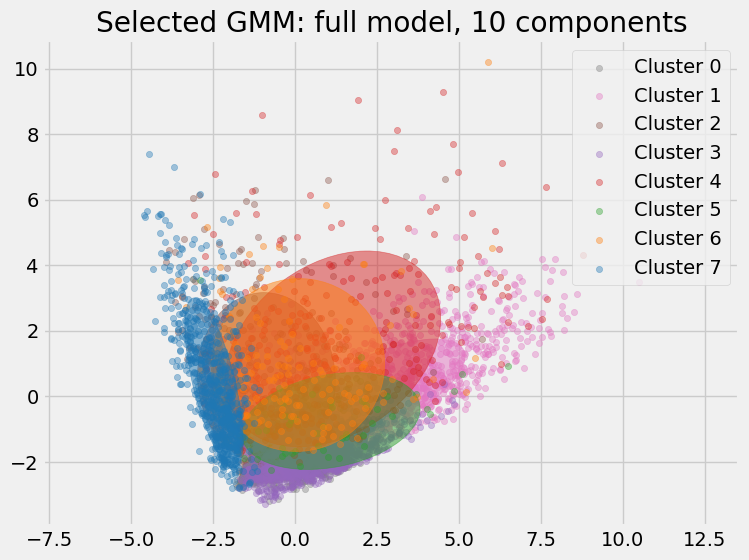

In [108]:

from matplotlib.patches import Ellipse
from scipy import linalg
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA


# Perform PCA
pca = PCA(n_components=2)
X_PCA = pca.fit_transform(norm_array)  #normalized data in array 

#best grid search result 
gmm = GaussianMixture(n_components=10, covariance_type='full', random_state=0).fit(norm_array)

# Predict cluster labels
Y_ = gmm.predict(norm_array)

# Set the color palette for 8 clusters
color_iter = sns.color_palette("tab10", 8)[::-1]

fig, ax = plt.subplots(figsize=(8, 6))

for i, (mean, cov, color) in enumerate(zip(gmm.means_, gmm.covariances_, color_iter)):
    if not np.any(Y_ == i):
        continue
    
    # Transform mean and covariance to PCA space
    mean_pca = pca.transform(mean.reshape(1, -1))[0]
    cov_pca = pca.components_ @ cov @ pca.components_.T

    # Plot the data points
    ax.scatter(X_PCA[Y_ == i, 0], X_PCA[Y_ == i, 1], s=20, alpha=0.4, color=color, label=f'Cluster {i}')

    # Compute the ellipse parameters
    v, w = linalg.eigh(cov_pca)
    angle = np.arctan2(w[0][1], w[0][0])
    angle = 180.0 * angle / np.pi  # Convert to degrees
    v = 2.0 * np.sqrt(2.0) * np.sqrt(v)
    ellipse = Ellipse(mean_pca, v[0], v[1], angle=180.0 + angle, color=color)
    ellipse.set_clip_box(fig.bbox)
    ellipse.set_alpha(0.5)
    ax.add_artist(ellipse)

plt.title(f"Selected GMM: {gmm.covariance_type} model, {gmm.n_components} components")
plt.axis("equal")
plt.legend()
plt.show()


<a id="gmmlike"></a>
## <p style=" font-family:roboto; color:babypink; font-size:115%; color:navy; text-align:left; padding: 0px">10.2 - <span style="color:navy;font-weight:bold"> GMM Log Likelihood


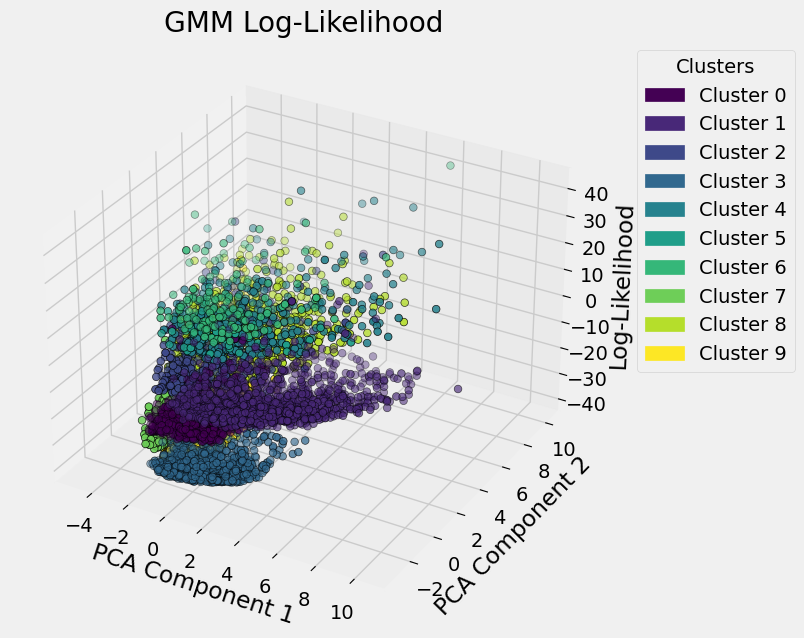

In [109]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.patches as mpatches


# Calculate the log-likelihood (negative because score_samples returns log-likelihood)
log_likelihood = -gmm.score_samples(norm_df)

# Determine unique cluster labels and colors
cluster_labels = np.unique(gmm.predict(norm_df))
cmap = plt.get_cmap('viridis')
colors = cmap(np.linspace(0, 1, len(cluster_labels)))

# Apply the specified style
plt.style.use('_mpl-gallery')

# Create a 3D plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of the data points
for cluster_label, color in zip(cluster_labels, colors):
    cluster_indices = np.where(gmm.predict(norm_df) == cluster_label)[0]
    ax.scatter(X_PCA[cluster_indices, 0], X_PCA[cluster_indices, 1], log_likelihood[cluster_indices],
               color=color, label=f'Cluster {cluster_label}', cmap='viridis', s=30, edgecolor='k')

ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('Log-Likelihood')
ax.set_title('GMM Log-Likelihood')

# Create a custom legend
handles = [mpatches.Patch(color=color, label=f'Cluster {cluster_label}') for cluster_label, color in zip(cluster_labels, colors)]
plt.legend(handles=handles, title="Clusters", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


<div style="border-radius:10px; padding: 30px; background-color: #ffd8e6; font-size:100%; text-align:left">
    
Therefore, clustering behavior offered by different approaches gives different number and distribution of clusters. PCA analysis is very important to visulaize the clustering behavior and provide a good comparison between them. 

<a id="conclud"></a>
# <p style="background-color:babypink; font-family:roboto; color:navy; font-size:125%;font-weight:bold; text-align:left; border-radius:25px 10px; padding: 10px">11 - Conclusion and Discussion on algorithms  </p>



In [137]:
Si_kmeans = silhouette_score(norm_df,kmeans.labels_)
CH_kmeans = calinski_harabasz_score(norm_df,kmeans.labels_)

#if len(set(dbscan.labels_)) > 1:
Si_dbscan = silhouette_score(norm_df,dbscan.labels_)
CH_dbscan = calinski_harabasz_score(norm_df,dbscan.labels_)
    
if len(set(dbscan.labels_)) > 1:
    Si_meanshift = silhouette_score(norm_df,meanshift.labels_)
    CH_meanshift = calinski_harabasz_score(norm_df,meanshift.labels_)
    
if len(set(minibatch.labels_)) > 1:
    Si_minibatch = silhouette_score(norm_df,minibatch.labels_)
    CH_minibatch = calinski_harabasz_score(norm_df,minibatch.labels_)
    

Si_gmm = silhouette_score(norm_df,gmm.predict(norm_df))
CH_gmm = calinski_harabasz_score(norm_df,gmm.predict(norm_df))

In [142]:
algorithms=pd.DataFrame({'Algorithm Name':['KMeans','DBSCAN','meanShift','MiniBatch', 'GMM'],
                          'Silhouette Score':[Si_kmeans, Si_dbscan, Si_meanshift, Si_minibatch, Si_gmm],
                           'CH score':[CH_kmeans, CH_dbscan, CH_meanshift, CH_minibatch, CH_gmm], 
                           })
algorithms

,Algorithm Name,Silhouette Score,CH score
0,KMeans,0.207619,1704.524944
1,DBSCAN,0.630329,12.487453
2,meanShift,0.414592,223.330739
3,MiniBatch,0.255570,1681.409373
4,GMM,0.035785,378.449543


In [144]:
algorithms.style.highlight_max(color = 'yellow', axis = 0, subset=['Silhouette Score','CH score'])

,Algorithm Name,Silhouette Score,CH score
0,KMeans,0.207619,1704.524944
1,DBSCAN,0.630329,12.487453
2,meanShift,0.414592,223.330739
3,MiniBatch,0.255570,1681.409373
4,GMM,0.035785,378.449543


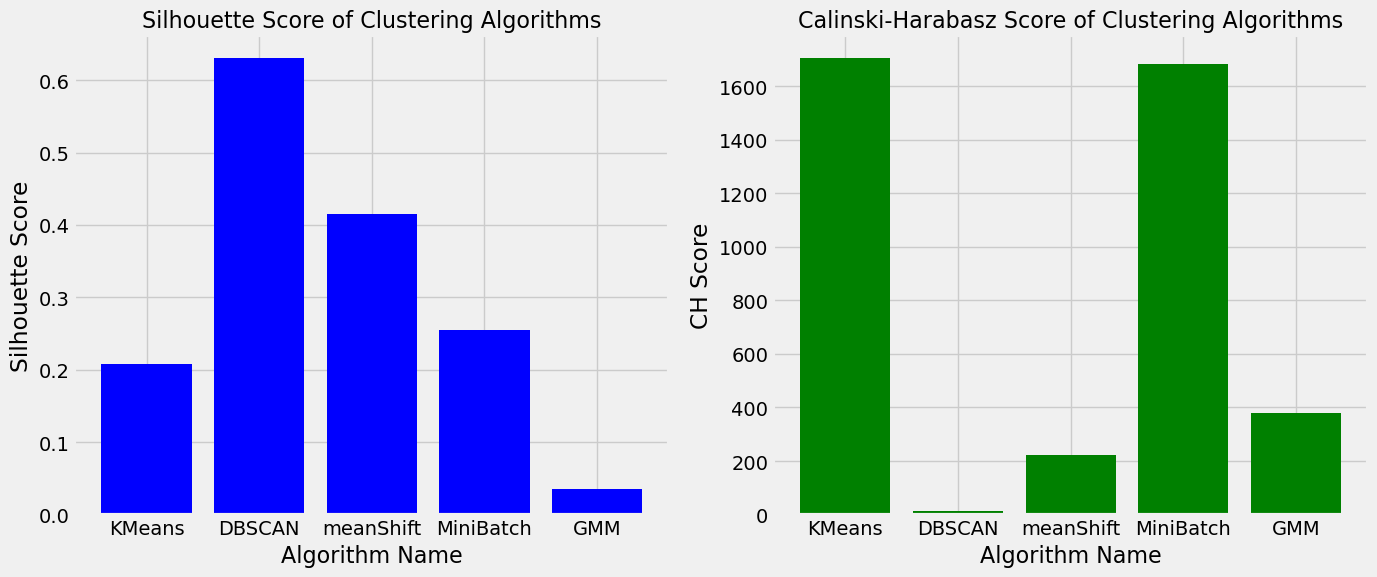

In [151]:
# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot silhouette scores
ax1.bar(algorithms['Algorithm Name'], algorithms['Silhouette Score'], color='blue')
ax1.set_title('Silhouette Score of Clustering Algorithms', fontsize = 16)
ax1.set_xlabel('Algorithm Name', fontsize = 16)
ax1.set_ylabel('Silhouette Score')

# Plot CH scores
ax2.bar(algorithms['Algorithm Name'], algorithms['CH score'], color='green')
ax2.set_title('Calinski-Harabasz Score of Clustering Algorithms', fontsize = 16)
ax2.set_xlabel('Algorithm Name', fontsize = 16)
ax2.set_ylabel('CH Score')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

<a id="cluster"></a>
# <p style="background-color:babypink; font-family:roboto; color:navy; font-size:125%;font-weight:bold; text-align:left; border-radius:25px 10px; padding: 10px">12 - Clustering and Visualization  </p>


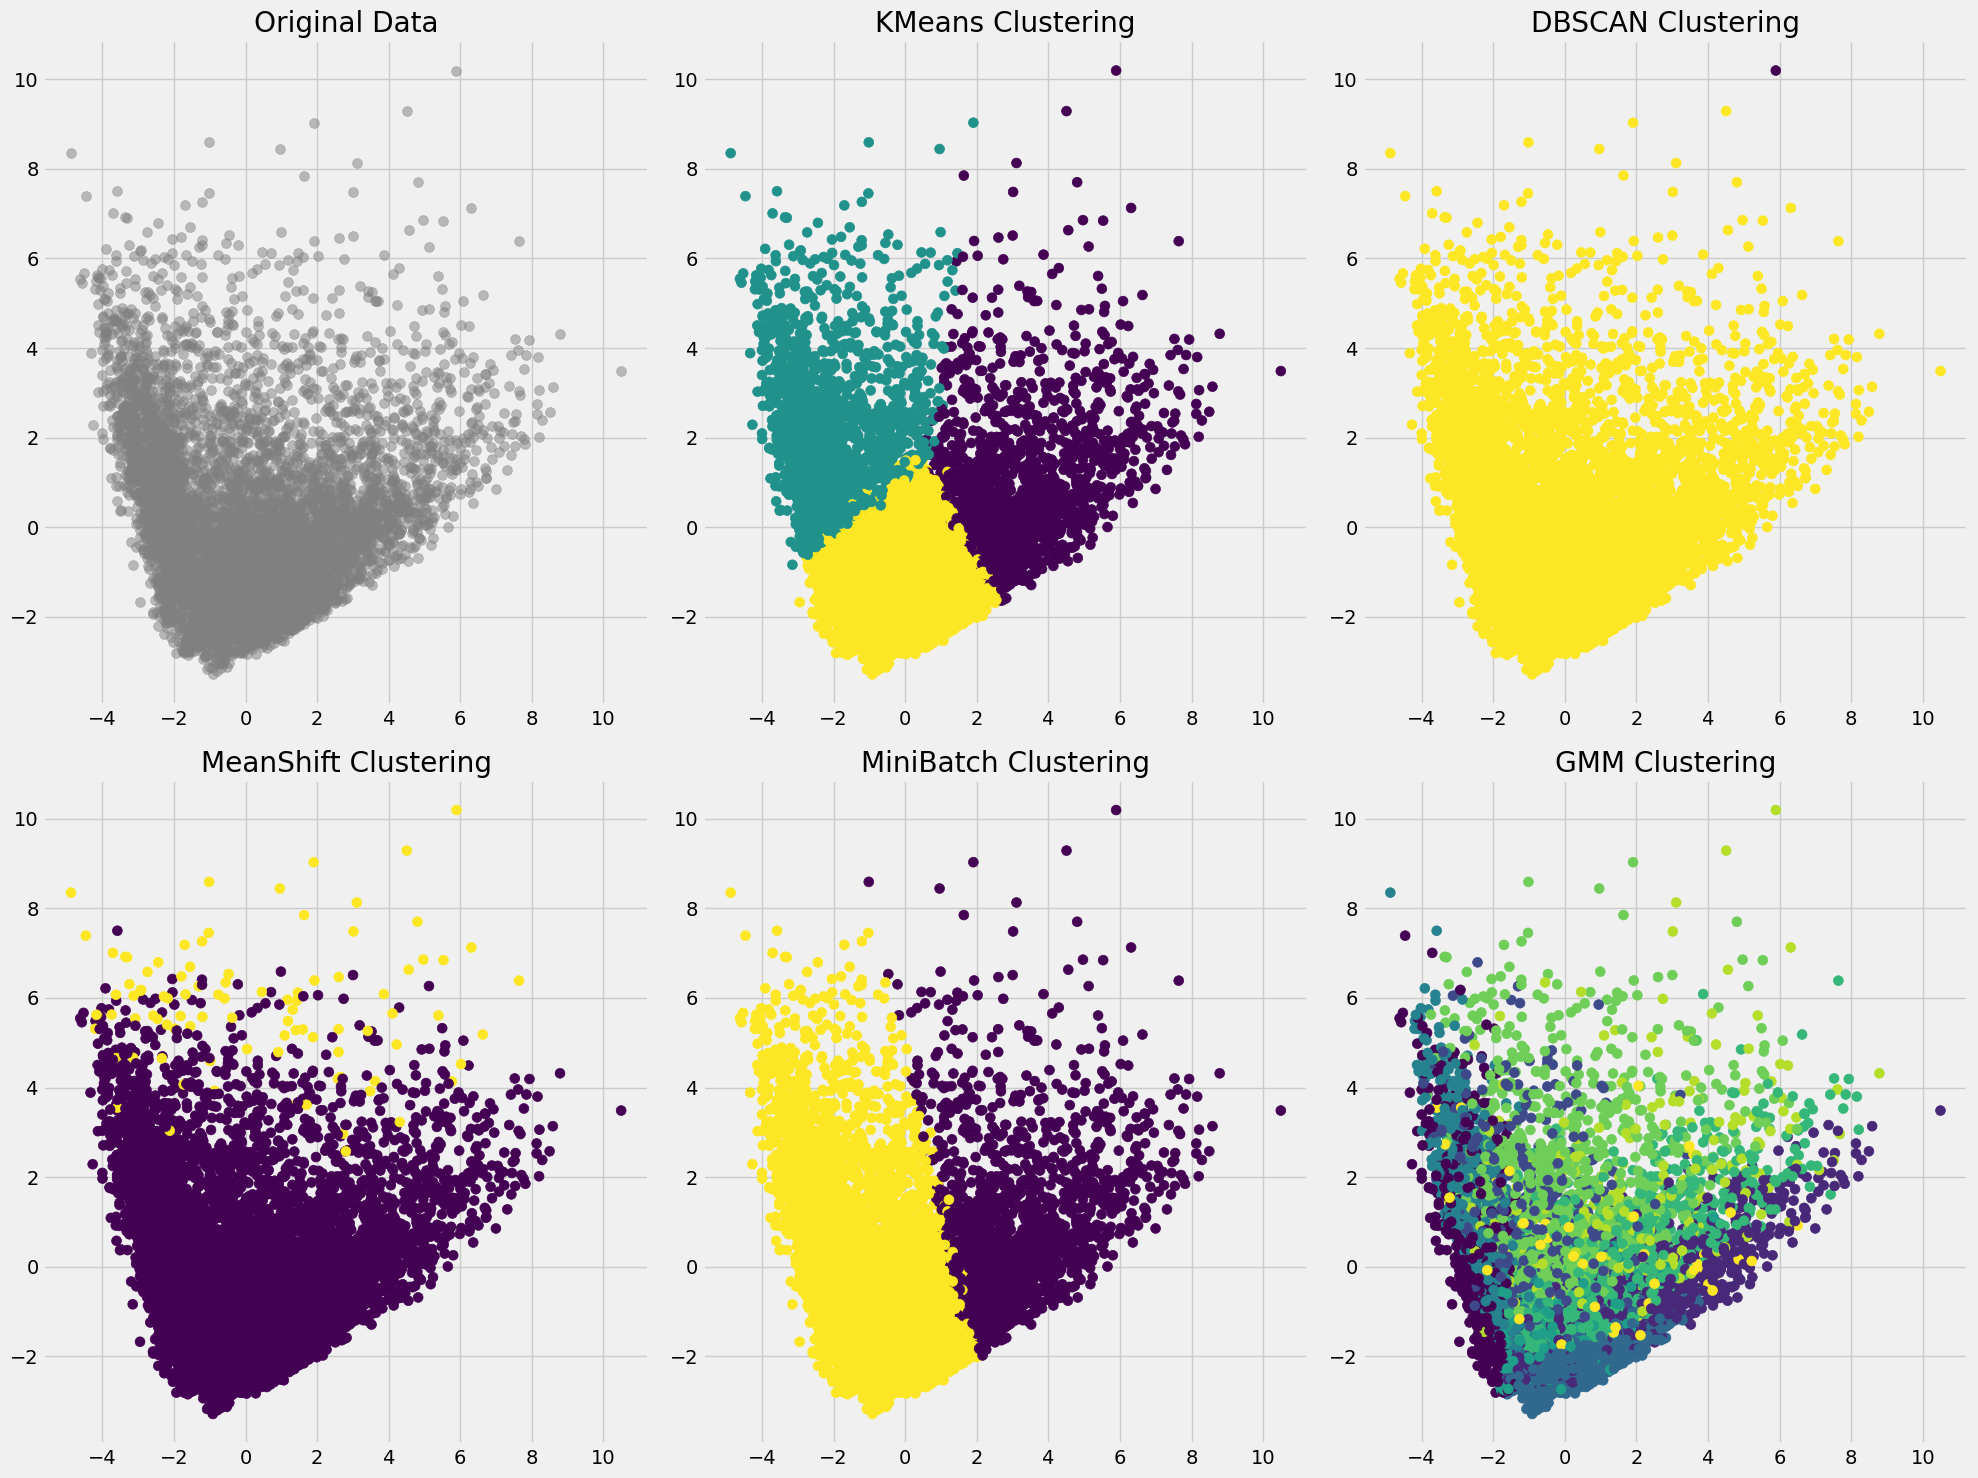

In [157]:
# Perform PCA
pca = PCA(n_components=2)
X_PCA = pca.fit_transform(norm_array)  #normalized data in array 

# Create a new DataFrame with PCA results and cluster labels
pca_df = pd.DataFrame(X_PCA, columns=['PCA1', 'PCA2'])
pca_df['KMeans'] = cluster_df['predict_kmean']
pca_df['DBSCAN'] = cluster_df['predict_DBSCAN']
pca_df['MeanShift'] = cluster_df['predict_Meanshift']
pca_df['MiniBatch'] = cluster_df['predict_Minibatch']
pca_df['GMM'] = cluster_df['predict_GMM']

# Plotting
fig, axes = plt.subplots(2, 3, figsize=(20, 15))

# Plot original data
axes[0,0].scatter(pca_df['PCA1'], pca_df['PCA2'], c='gray', s=50, alpha=0.5)
axes[0,0].set_title('Original Data')

# Plot KMeans clustering
axes[0,1].scatter(pca_df['PCA1'], pca_df['PCA2'], c=pca_df['KMeans'], s=50, cmap='viridis')
axes[0,1].set_title('KMeans Clustering')

# Plot DBSCAN clustering
axes[0,2].scatter(pca_df['PCA1'], pca_df['PCA2'], c=pca_df['DBSCAN'], s=50, cmap='viridis')
axes[0,2].set_title('DBSCAN Clustering')

# Plot MeanShift clustering
axes[1,0].scatter(pca_df['PCA1'], pca_df['PCA2'], c=pca_df['MeanShift'], s=50, cmap='viridis')
axes[1,0].set_title('MeanShift Clustering')

# Plot MiniBatch clustering
axes[1,1].scatter(pca_df['PCA1'], pca_df['PCA2'], c=pca_df['MiniBatch'], s=50, cmap='viridis')
axes[1,1].set_title('MiniBatch Clustering')

# Plot GMM clustering
axes[1,2].scatter(pca_df['PCA1'], pca_df['PCA2'], c=pca_df['GMM'], s=50, cmap='viridis')
axes[1,2].set_title('GMM Clustering')

# Adjust layout
plt.tight_layout()
plt.show()